In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from mca import *

warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
## Load the training data
df = pd.read_csv("/Users/Jonathan.Toro/Documents/Hunter/STAT 707/Final Project/Data/training.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 81 columns):
Id               1060 non-null int64
MSSubClass       1060 non-null int64
MSZoning         1060 non-null object
LotFrontage      872 non-null float64
LotArea          1060 non-null int64
Street           1060 non-null object
Alley            73 non-null object
LotShape         1060 non-null object
LandContour      1060 non-null object
Utilities        1060 non-null object
LotConfig        1060 non-null object
LandSlope        1060 non-null object
Neighborhood     1060 non-null object
Condition1       1060 non-null object
Condition2       1060 non-null object
BldgType         1060 non-null object
HouseStyle       1060 non-null object
OverallQual      1060 non-null int64
OverallCond      1060 non-null int64
YearBuilt        1060 non-null int64
YearRemodAdd     1060 non-null int64
RoofStyle        1060 non-null object
RoofMatl         1060 non-null object
Exterior1st      1060 non-nu

In [6]:
mssubclass_mapping = {
        20: "1-STORY 1946 & NEWER ALL STYLES.MSSubClass",
        30: "1-STORY 1945 & OLDER.MSSubClass",
        40: "1-STORY W/FINISHED ATTIC ALL AGES.MSSubClass",
        45: "1-1/2 STORY - UNFINISHED ALL AGES.MSSubClass",
        50: "1-1/2 STORY FINISHED ALL AGES.MSSubClass",
        60: "2-STORY 1946 & NEWER.MSSubClass",
        70: "2-STORY 1945 & OLDER.MSSubClass",
        75: "2-1/2 STORY ALL AGES.MSSubClass",
        80: "SPLIT OR MULTI-LEVEL.MSSubClass",
        85: "SPLIT FOYER.MSSubClass",
        90: "DUPLEX - ALL STYLES AND AGES.MSSubClass",
        120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER.MSSubClass",
        150: "1-1/2 STORY PUD - ALL AGES.MSSubClass",
        160: "2-STORY PUD - 1946 & NEWER.MSSubClass",
        180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER.MSSubClass",
        190: "2 FAMILY CONVERSION - ALL STYLES AND AGES.MSSubClass"
}

mszoning_mapping = {
        "A": "Agriculture.MSZoning",
        "C": "Commercial.MSZoning",
        "FV": "Floating Village Residential.MSZoning",
        "I": "Industrial.MSZoning",
        "RH": "Residential High Density.MSZoning",
        "RL": "Residential Low Density.MSZoning",
        "RP": "Residential Low Density Park.MSZoning",
        "RM": "Residential Medium Density.MSZoning"
}

street_mapping = {
        "Grvl": "Gravel.Street",
        "Pave": "Paved.Street"
}

alley_mapping = {
        "Grvl": "Gravel.Alley",
        "Pave": "Paved.Alley",
        "NA": "No alley access.Alley1"
}

lotshape_mapping = {
    "Reg": "Regular.LotShape",
    "IR1": "Slightly irregular.LotShape",
    "IR2": "Moderately Irregular.LotShape",
    "IR3": "Irregular.LotShape"
}

landcontour_mapping = {
    "Lvl": "Near Flat/Level.LandCountour",
    "Bnk": "Banked - Quick and significant rise from street grade to building.LandCountour",
    "HLS": "Hillside - Significant slope from side to side.LandCountour",
    "Low": "Depression.LandCountour"
}

utilities_mapping = {
    "AllPub": "All public Utilities (E,G,W,& S).Utilities",
    "NoSewr": "Electricity, Gas, and Water (Septic Tank).Utilities",
    "NoSeWa": "Electricity and Gas Only.Utilities",
    "ELO": "Electricity only.Utilities"
}

lotconfig_mapping = {
    "Inside": "Inside lot.LotConfig",
    "Corner": "Corner lot.LotConfig",
    "CulDSac": "Cul-de-sac.LotConfig",
    "FR2": "Frontage on 2 sides of property.LotConfig",
    "FR3": "Frontage on 3 sides of property.LotConfig"
}

landslope_mapping = {
    "Gtl": "Gentle slope.LandSlope",
    "Mod": "Moderate Slope.LandSlope",
    "Sev": "Severe Slope.LandSlope"
}

neighborhood_mapping = {   
    "Blmngtn": "Bloomington Heights.Neighborhood",
    "Blueste": "Bluestem.Neighborhood",
    "BrDale": "Briardale.Neighborhood",
    "BrkSide": "Brookside.Neighborhood",
    "ClearCr": "Clear Creek.Neighborhood",
    "CollgCr": "College Creek.Neighborhood",
    "Crawfor": "Crawford.Neighborhood",
    "Edwards": "Edwards.Neighborhood",
    "Gilbert": "Gilbert.Neighborhood",
    "IDOTRR": "Iowa DOT and Rail Road.Neighborhood",
    "MeadowV": "Meadow Village.Neighborhood",
    "Mitchel": "Mitchell.Neighborhood",
    "Names": "North Ames.Neighborhood",
    "NoRidge": "Northridge.Neighborhood",
    "NPkVill": "Northpark Villa.Neighborhood",
    "NridgHt": "Northridge Heights.Neighborhood",
    "NWAmes": "Northwest Ames.Neighborhood",
    "OldTown": "Old Town.Neighborhood",
    "SWISU": "South & West of Iowa State University.Neighborhood",
    "Sawyer": "Sawyer.Neighborhood",
    "SawyerW": "Sawyer West.Neighborhood",
    "Somerst": "Somerset.Neighborhood",
    "StoneBr": "Stone Brook.Neighborhood",
    "Timber": "Timberland.Neighborhood",
    "Veenker": "Veenker.Neighborhood"}

condition1_mapping = {
    "Artery": "Adjacent to arterial street.Condition1",
    "Feedr": "Adjacent to feeder street.Condition1",
    "Norm": "Normal.Condition1",
    "RRNn": "Within 200' of North-South Railroad.Condition1",
    "RRAn": "Adjacent to North-South Railroad.Condition1",
    "PosN": "Near positive off-site feature--park, greenbelt, etc.Condition1",
    "PosA": "Adjacent to postive off-site feature.Condition1",
    "RRNe": "Within 200' of East-West Railroad.Condition1",
    "RRAe": "Adjacent to East-West Railroad.Condition1"
}

condition2_mapping = {
    "Artery": "Adjacent to arterial street.Condition2",
    "Feedr": "Adjacent to feeder street.Condition2",
    "Norm": "Normal.Condition2",
    "RRNn": "Within 200' of North-South Railroad.Condition2",
    "RRAn": "Adjacent to North-South Railroad.Condition2",
    "PosN": "Near positive off-site feature--park, greenbelt, etc.Condition2",
    "PosA": "Adjacent to postive off-site feature.Condition2",
    "RRNe": "Within 200' of East-West Railroad.Condition2",
    "RRAe": "Adjacent to East-West Railroad.Condition2"
}

bldgtype_mapping = {
    "1Fam": "Single-family Detached.BldgType",
    "2FmCon": "Two-family Conversion; originally built as one-family dwelling.BldgType",
    "Duplx": "Duplex.BldgType",
    "TwnhsE": "Townhouse End Unit.BldgType",
    "TwnhsI": "Townhouse Inside Unit.BldgType"
}

housestyle_mapping = {
    "1Story": "One story.HouseStyle",
    "1.5Fin": "One and one-half story: 2nd level finished.HouseStyle",
    "1.5Unf": "One and one-half story: 2nd level unfinished.HouseStyle",
    "2Story": "Two story.HouseStyle",
    "2.5Fin": "Two and one-half story: 2nd level finished.HouseStyle",
    "2.5Unf": "Two and one-half story: 2nd level unfinished.HouseStyle",
    "SFoyer": "Split Foyer.HouseStyle",
    "SLvl": "Split Level.HouseStyle"
}

roofstyle_mapping = {
    "Flat": "Flat.RoofStyle",
    "Gable": "Gable.RoofStyle",
    "Gambrel": "Gabrel (Barn).RoofStyle",
    "Hip": "Hip.RoofStyle",
    "Mansard": "Mansard.RoofStyle",
    "Shed": "Shed.RoofStyle"
}

roofmatl_mapping = {
    "ClyTile": "Clay or Tile.RoofMatl",
    "CompShg": "Standard (Composite) Shingle.RoofMatl",
    "Membran": "Membrane.RoofMatl",
    "Metal": "Metal.RoofMatl",
    "Roll": "Roll.RoofMatl",
    "Tar&Grv": "Gravel & Tar.RoofMatl",
    "WdShake": "Wood Shakes.RoofMatl",
    "WdShngl": "Wood Shingles.RoofMatl"
}

exterior1_mapping = {
    "AsbShng": "Asbestos Shingles.Exterior1",
    "AsphShn": "Asphalt Shingles.Exterior1",
    "BrkComm": "Brick Common.Exterior1",
    "BrkFace": "Brick Face.Exterior1",
    "CBlock": "Cinder Block.Exterior1",
    "CemntBd": "Cement Board.Exterior1",
    "HdBoard": "Hard Board.Exterior1",
    "ImStucc": "Imitation Stucco.Exterior1",
    "MetalSd": "Metal Siding.Exterior1",
    "Other": "Other.Exterior1",
    "Plywood": "Plywood.Exterior1",
    "PreCast": "PreCast.Exterior1",
    "Stone": "Stone.Exterior1",
    "Stucco": "Stucco.Exterior1",
    "VinylSd": "Vinyl Siding.Exterior1",
    "Wd Sdng": "Wood Siding.Exterior1",
    "WdShing": "Wood Shingles.Exterior1"
}

exterior2_mapping = {
    "AsbShng": "Asbestos Shingles.Exterior2",
    "AsphShn": "Asphalt Shingles.Exterior2",
    "BrkComm": "Brick Common.Exterior2",
    "BrkFace": "Brick Face.Exterior2",
    "CBlock": "Cinder Block.Exterior2",
    "CemntBd": "Cement Board.Exterior2",
    "HdBoard": "Hard Board.Exterior2",
    "ImStucc": "Imitation Stucco.Exterior2",
    "MetalSd": "Metal Siding.Exterior2",
    "Other": "Other.Exterior2",
    "Plywood": "Plywood.Exterior2",
    "PreCast": "PreCast.Exterior2",
    "Stone": "Stone.Exterior2",
    "Stucco": "Stucco.Exterior2",
    "VinylSd": "Vinyl Siding.Exterior2",
    "Wd Sdng": "Wood Siding.Exterior2",
    "WdShing": "Wood Shingles.Exterior2"
}

masnvrtype_mapping = {
    "BrkCmn": "Brick Common.MasVnrType",
    "BrkFace": "Brick Face.MasVnrType",
    "CBlock": "Cinder Block.MasVnrType",
    "None": "None.MasVnrType",
    "Stone": "Stone.MasVnrType"  
}

exterqual_mapping = {
    "Ex": "Excellent.ExterQual",
    "Gd": "Good.ExterQual",
    "TA": "Average/Typical.ExterQual",
    "Fa": "Fair.ExterQual",
    "Po": "Poor.ExterQual"
}

extercond_mapping = {
    "Ex": "Excellent.ExterCond",
    "Gd": "Good.ExterCond",
    "TA": "Average/Typical.ExterCond",
    "Fa": "Fair.ExterCond",
    "Po": "Poor.ExterCond"
}

foundation_mapping = {
    "BrkTil": "Brick & Tile.Foundation",
    "CBlock": "Cinder Block.Foundation",
    "PConc": "Poured Contrete.Foundation",
    "Slab": "Slab.Foundation",
    "Stone": "Stone.Foundation",
    "Wood": "Wood.Foundation"
}

bsmtqual_mapping = {
    "Ex": "Excellent (100+ inches).BsmtQual",
    "Gd": "Good (90-99 inches).BsmtQual",
    "TA": "Typical (80-89 inches).BsmtQual",
    "Fa": "Fair (70-79 inches).BsmtQual",
    "Po": "Poor (<70 inches).BsmtQual",
    "NA": "No Basement.BsmtQual"
}

bsmtcondition_mapping = {
    "Ex": "Excellent.BsmtCond",
    "Gd": "Good.BsmtCond",
    "TA": "Typical - slight dampness allowed.BsmtCond",
    "Fa": "Fair - dampness or some cracking or settling.BsmtCond",
    "Po": "Poor - Severe cracking, settling, or wetness.BsmtCond",
    "NA": "No Basement.BsmtCond"
}

bsmtexposure_mapping = {
    "Gd": "Good Exposure.BsmtExposure",
    "Av": "Average Exposure (split levels or foyers typically score average or above).BsmtExposure",
    "Mn": "Mimimum Exposure.BsmtExposure",
    "No": "No Exposure.BsmtExposure",
    "NA": "No Basement.BsmtExposure"
}

bsmtfintype1_mapping = {
    "GLQ": "Good Living Quarters.BsmtFinType1",
    "ALQ": "Average Living Quarters.BsmtFinType1",
    "BLQ": "Below Average Living Quarters.BsmtFinType1",
    "Rec": "Average Rec Room.BsmtFinType1",
    "LwQ": "Low Quality.BsmtFinType1",
    "Unf": "Unfinshed.BsmtFinType1",
    "NA": "No Basement.BsmtFinType1"
}

bsmtfintype2_mapping = {
    "GLQ": "Good Living Quarters.BsmtFinType2",
    "ALQ": "Average Living Quarters.BsmtFinType2",
    "BLQ": "Below Average Living Quarters.BsmtFinType2",
    "Rec": "Average Rec Room.BsmtFinType2",
    "LwQ": "Low Quality.BsmtFinType2",
    "Unf": "Unfinshed.BsmtFinType2",
    "NA": "No Basement.BsmtFinType2"
}

heating_mapping = {
    "Floor": "Floor Furnace.Heating",
    "GasA": "Gas forced warm air furnace.Heating",
    "GasW": "Gas hot water or steam heat.Heating",
    "Grav": "Gravity furnace.Heating",
    "OthW": "Hot water or steam heat other than gas.Heating",
    "Wall": "Wall furnace.Heating"
}

heatingqc_mapping = {
    "Ex": "Excellent.HeatingQC",
    "Gd": "Good.HeatingQC",
    "TA": "Average/Typical.HeatingQC",
    "Fa": "Fair.HeatingQC",
    "Po": "Poor.HeatingQC" 
}

centralair_mapping = {
    "N": "No.CentralAir",
    "Y": "Yes.CentralAir"
}

electrical_mapping = {
    "SBrkr": "Standard Circuit Breakers & Romex.Electrical",
    "FuseA": "Fuse Box over 60 AMP and all Romex wiring (Average).Electrical",
    "FuseF": "60 AMP Fuse Box and mostly Romex wiring (Fair).Electrical",
    "FuseP": "60 AMP Fuse Box and mostly knob & tube wiring (poor).Electrical",
    "Mix": "Mixed"
}

kitchenqual_mapping = {
    "Ex": "Excellent.KitchenQual",
    "Gd": "Good.KitchenQual",
    "TA": "Typical/Average.KitchenQual",
    "Fa": "Fair.KitchenQual",
    "Po": "Poor.KitchenQual"  
}

functional_mapping = {
    "Typ": "Typical Functionality.Funcational",
    "Min1": "Minor Deductions 1.Funcational",
    "Min2": "Minor Deductions 2.Funcational",
    "Mod": "Moderate Deductions.Funcational",
    "Maj1": "Major Deductions 1.Funcational",
    "Maj2": "Major Deductions 2.Funcational",
    "Sev": "Severely Damaged.Funcational",
    "Sal": "Salvage only.Funcational"
}

fireplacequ_mapping = {
    "Ex": "Excellent - Exceptional Masonry Fireplace.FireplaceQu",
    "Gd": "Good - Masonry Fireplace in main level.FireplaceQu",
    "TA": "Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement.FireplaceQu",
    "Fa": "Fair - Prefabricated Fireplace in basement.FireplaceQu",
    "Po": "Poor - Ben Franklin Stove.FireplaceQu",
    "NA": "No Fireplace.FireplaceQu"
}

garagetype_mapping = {
    "2Types": "More than one type of garage.GarageType",
    "Attchd": "Attached to home.GarageType",
    "Basment": "Basement Garage.GarageType",
    "BuiltIn": "Built-In (Garage part of house - typically has room above garage).GarageType",
    "CarPort": "Car Port.GarageType",
    "Detchd": "Detached from home.GarageType",
    "NA": "No Garage.GarageType"
}

garagefinish_mapping = {
    "Fin": "Finished.GarageFinish",
    "RFn": "Rough Finished.GarageFinish",
    "Unf": "Unfinished.GarageFinish",
    "NA": "No Garage.GarageFinish"
}

garagequal_mapping = {
    "Ex": "Excellent.GarageQual",
    "Gd": "Good.GarageQual",
    "TA": "Typical/Average.GarageQual",
    "Fa": "Fair.GarageQual",
    "Po": "Poor.GarageQual",
    "NA": "No Garage.GarageQual"  
}

garagecond_mapping = {
    "Ex": "Excellent.GarageCond",
    "Gd": "Good.GarageCond",
    "TA": "Typical/Average.GarageCond",
    "Fa": "Fair.GarageCond",
    "Po": "Poor.GarageCond",
    "NA": "No Garage.GarageCond"  
}

paveddrive_mapping = {
    "Y": "Paved.Driveway",
    "P": "Partial Pavement.Driveway",
    "N": "Dirt/Gravel.Driveway"
}

poolqc_mapping = {
    "Ex": "Excellent.PooQC",
    "Gd": "Good.PooQC",
    "TA": "Average/Typical.PooQC",
    "Fa": "Fair.PooQC",
    "NA": "No Pool.PooQC"
}

fence_mapping = {
    "GdPrv": "Good Privacy.Fence",
    "MnPrv": "Minimum Privacy.Fence",
    "GdWo": "Good Wood.Fence",
    "MnWw": "Minimum Wood/Wire.Fence",
    "NA": "No Fence.Fence"
}

miscfeature_mapping = {
    "Elev": "Elevator",
    "Gar2": "2nd Garage (if not described in garage section)",
    "Othr": "Other",
    "Shed": "Shed (over 100 SF)",
    "TenC": "Tennis Court",
    "NA": "None"
}

saletype_mapping = {
    "WD": "Warranty Deed - Conventional",
    "CWD": "Warranty Deed - Cash",
    "VWD": "Warranty Deed - VA Loan",
    "New": "Home just constructed and sold",
    "COD": "Court Officer Deed/Estate",
    "Con": "Contract 15% Down payment regular terms",
    "ConLw": "Contract Low Down payment and low interest",
    "ConLI": "Contract Low Interest",
    "ConLD": "Contract Low Down",
    "Oth": "Other"
}

salecondition_mapping = {
    "Normal": "Normal Sale",
    "Abnorml": "Abnormal Sale -  trade, foreclosure, short sale",
    "AdjLand": "Adjoining Land Purchase",
    "Alloca": "Allocation - two linked properties with separate deeds, typically condo with a garage unit",
    "Family": "Sale between family members",
    "Partial": "Home was not completed when last assessed (associated with New Homes)"
}

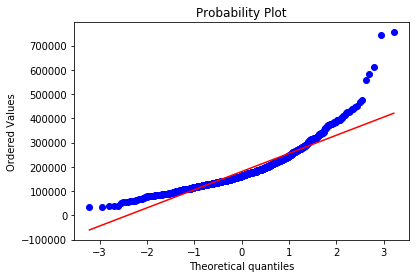

In [7]:
import pylab 
import scipy.stats as stats

stats.probplot(df["SalePrice"], dist="norm", plot=pylab)
pylab.show()

We can see that there is a large skew. Taking the natural log may help make this more normal.

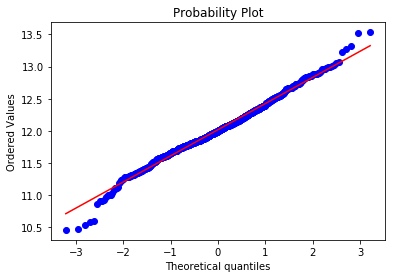

In [8]:
import pylab 
import scipy.stats as stats

stats.probplot(np.log(df["SalePrice"]), dist="norm", plot=pylab)
pylab.show()

The QQ plot of log transformed Sale Price look much better. We will implement our models using this transformation.

<Figure size 4320x4320 with 0 Axes>

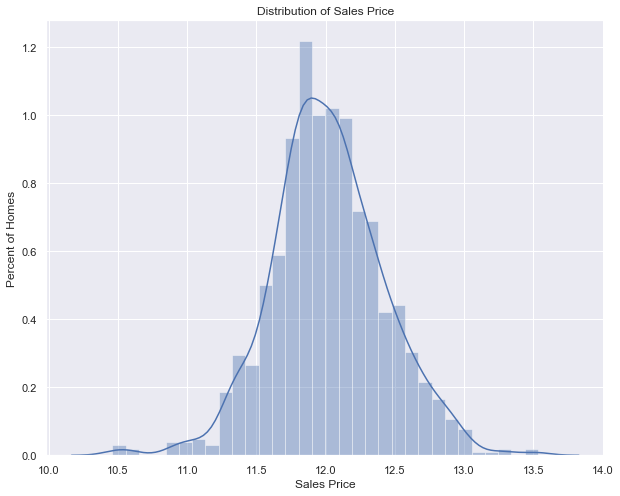

<Figure size 4320x4320 with 0 Axes>

In [9]:
sns.set(rc={'figure.figsize':(10,8)});
sns.distplot(np.log(df["SalePrice"]))
plt.title("Distribution of Sales Price")
plt.xlabel("Sales Price")
plt.ylabel("Percent of Homes")
plt.figure(figsize = (60,60))

In [10]:
df["Log Sale Price"] = df["SalePrice"].apply(lambda x: np.log(x))

In [11]:
df.select_dtypes(include = ["object"]).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

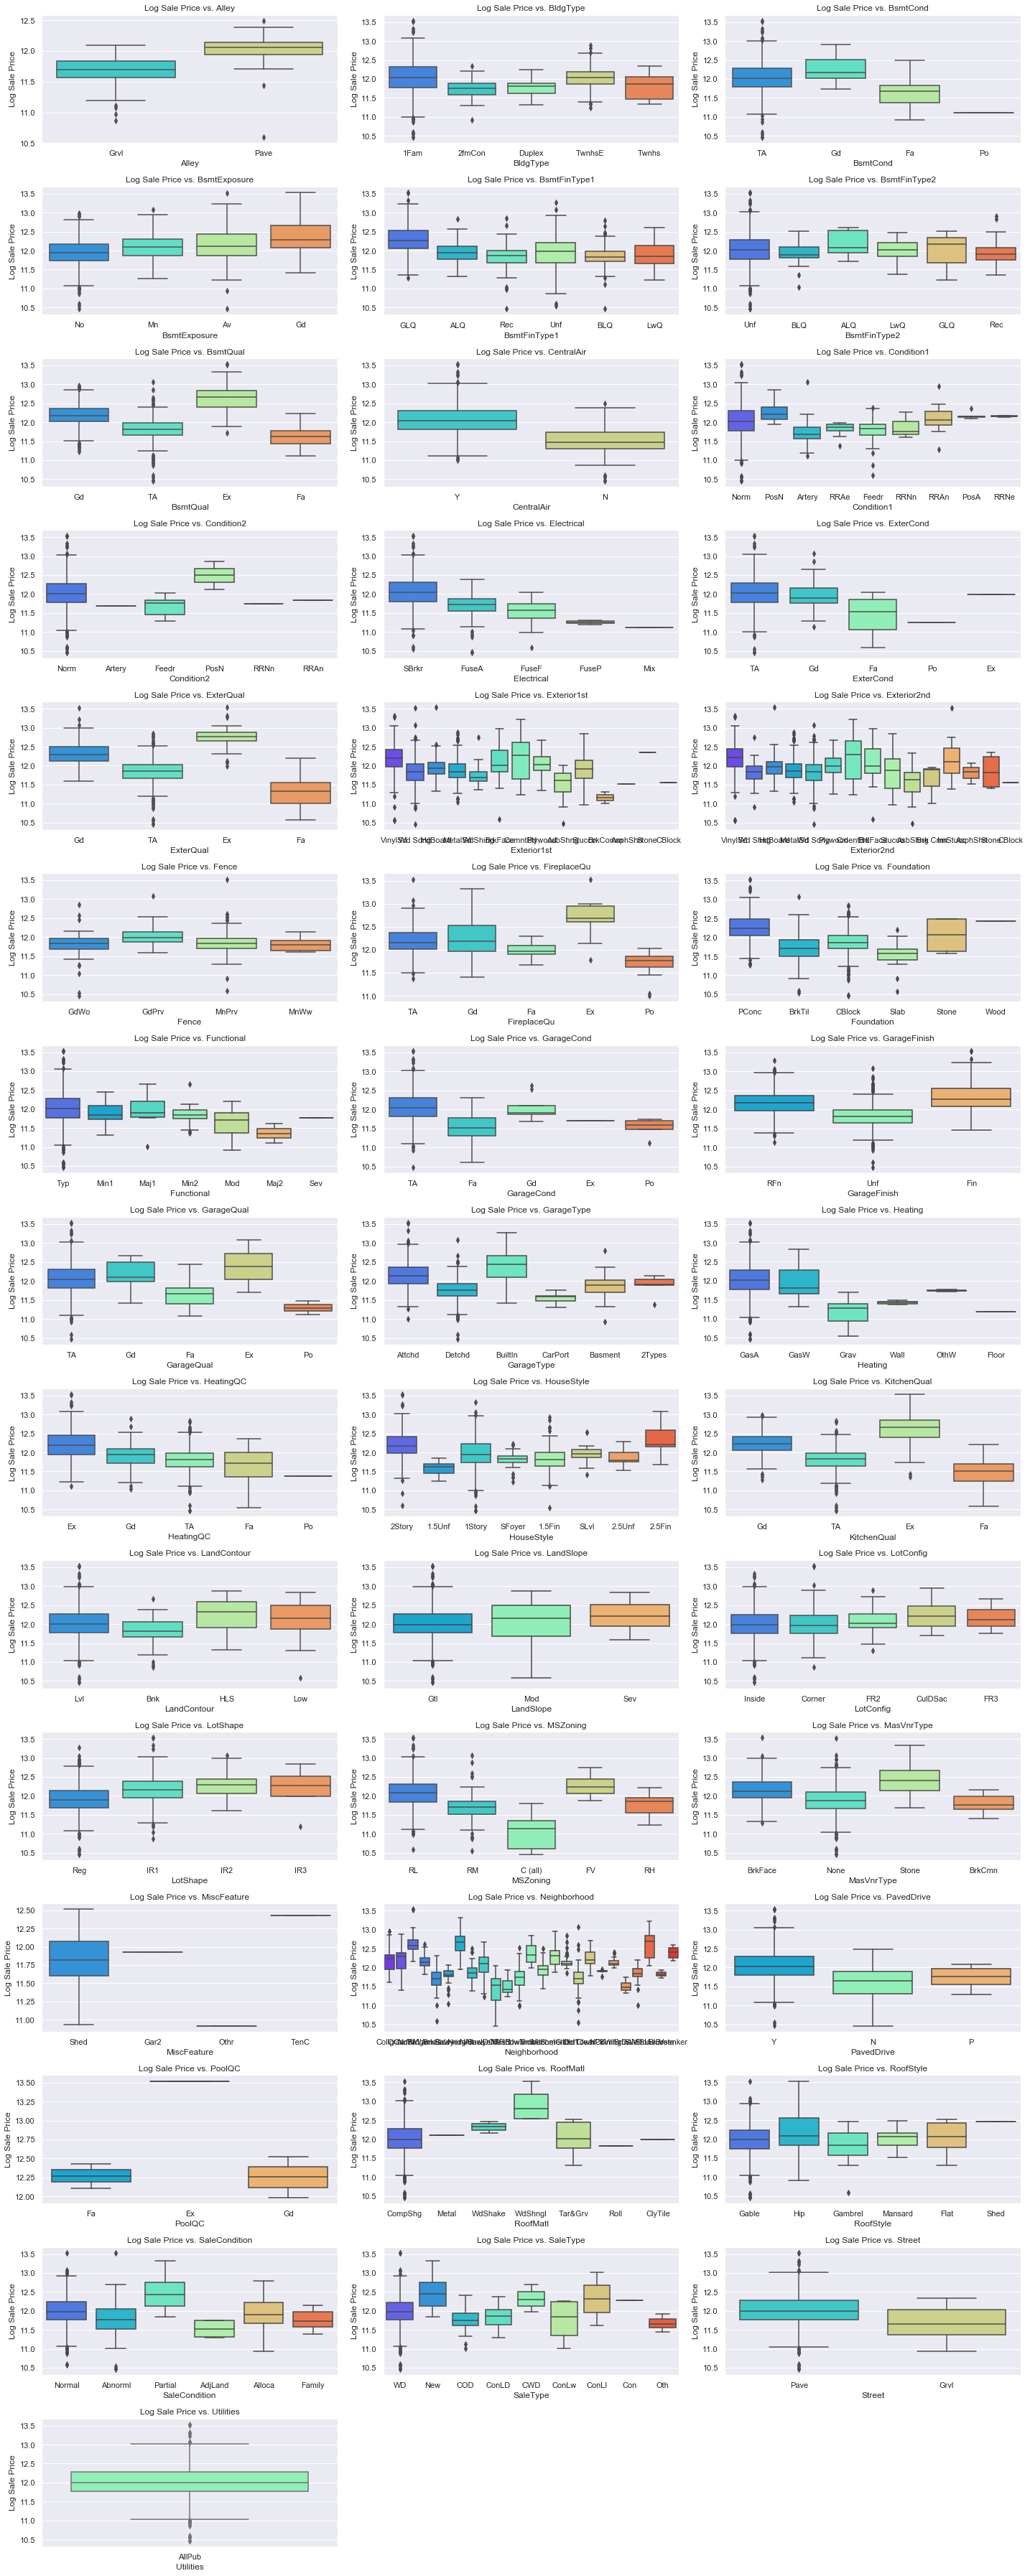

In [12]:
categorial_columns = sorted(df.select_dtypes(include = ["object"]).columns)

plt.figure(figsize=(20,50))
plt.tight_layout()
for a, b in zip(range(1,len(categorial_columns)+1),categorial_columns):
    plt.subplot(15, 3, a)
    sns.boxplot(x= b, y= "Log Sale Price",palette='rainbow', data = df)
    plt.xlabel(b)
    plt.ylabel("Log Sale Price")
    plt.title("Log Sale Price vs. " + b)
plt.tight_layout()

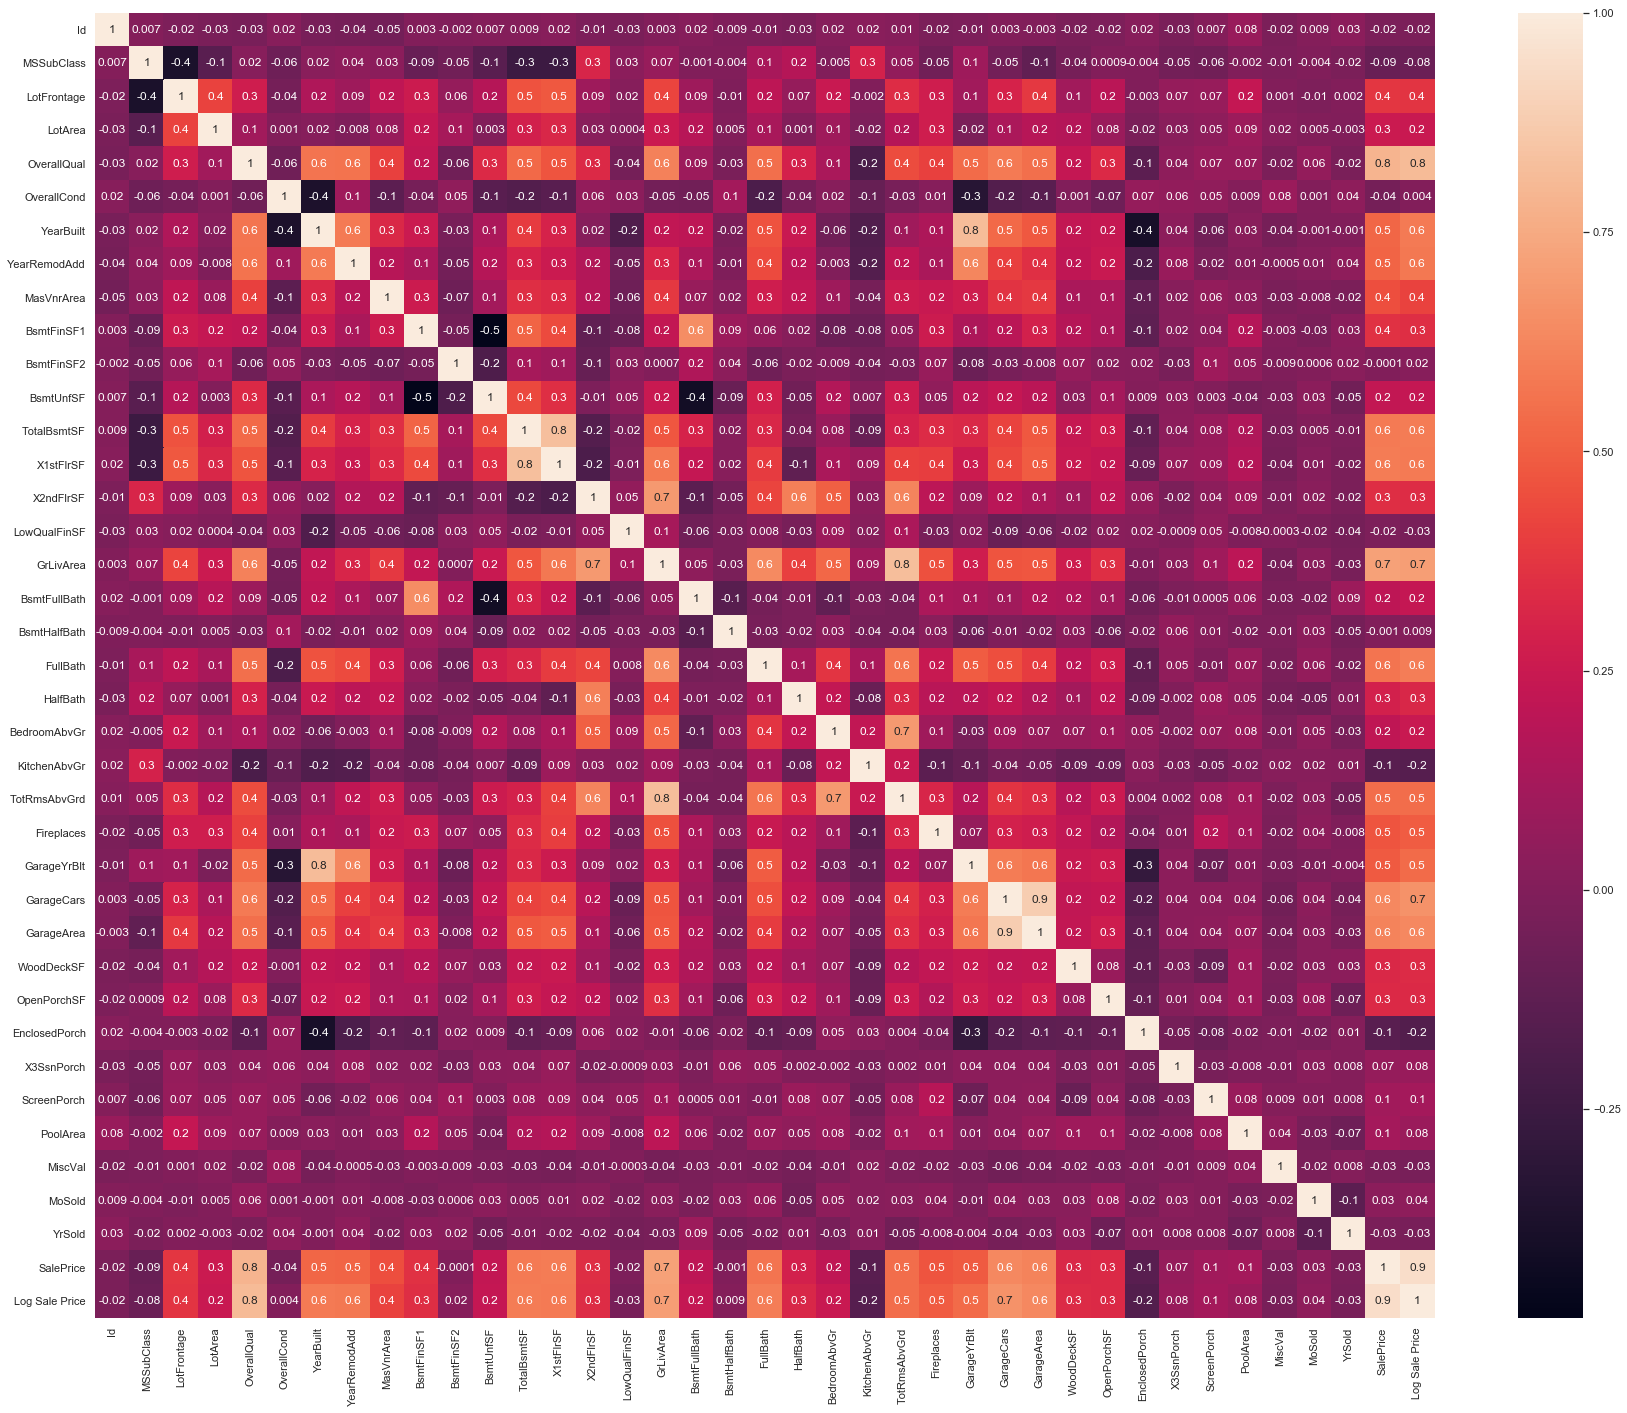

In [13]:
sns.set(rc={'figure.figsize':(30,24)});
sns.heatmap(df.corr(), annot = True, fmt = ".1g")

In [14]:
## Identify numeric columns
numeric_columns = df.select_dtypes(include = ['number']).drop("SalePrice", 1).columns

## Find the highest correlated variables
variables_with_correlation = []
for i in numeric_columns:
    variables_with_correlation.append([i, round(df["Log Sale Price"].corr(df[i]),2)])
    
## Sort the list
variables_with_correlation.sort(key=lambda x: x[1], reverse=True)

for i in variables_with_correlation:
    print(i[0], ":",i[1])

Log Sale Price : 1.0
OverallQual : 0.81
GrLivArea : 0.7
GarageCars : 0.66
GarageArea : 0.63
TotalBsmtSF : 0.59
FullBath : 0.59
YearBuilt : 0.58
YearRemodAdd : 0.58
X1stFlrSF : 0.58
TotRmsAbvGrd : 0.55
GarageYrBlt : 0.54
Fireplaces : 0.49
MasVnrArea : 0.41
LotFrontage : 0.37
BsmtFinSF1 : 0.35
X2ndFlrSF : 0.34
WoodDeckSF : 0.34
OpenPorchSF : 0.33
HalfBath : 0.32
LotArea : 0.25
BedroomAbvGr : 0.25
BsmtUnfSF : 0.23
BsmtFullBath : 0.23
ScreenPorch : 0.12
X3SsnPorch : 0.08
PoolArea : 0.08
MoSold : 0.04
BsmtFinSF2 : 0.02
BsmtHalfBath : 0.01
OverallCond : 0.0
Id : -0.02
LowQualFinSF : -0.03
MiscVal : -0.03
YrSold : -0.03
MSSubClass : -0.08
KitchenAbvGr : -0.15
EnclosedPorch : -0.17


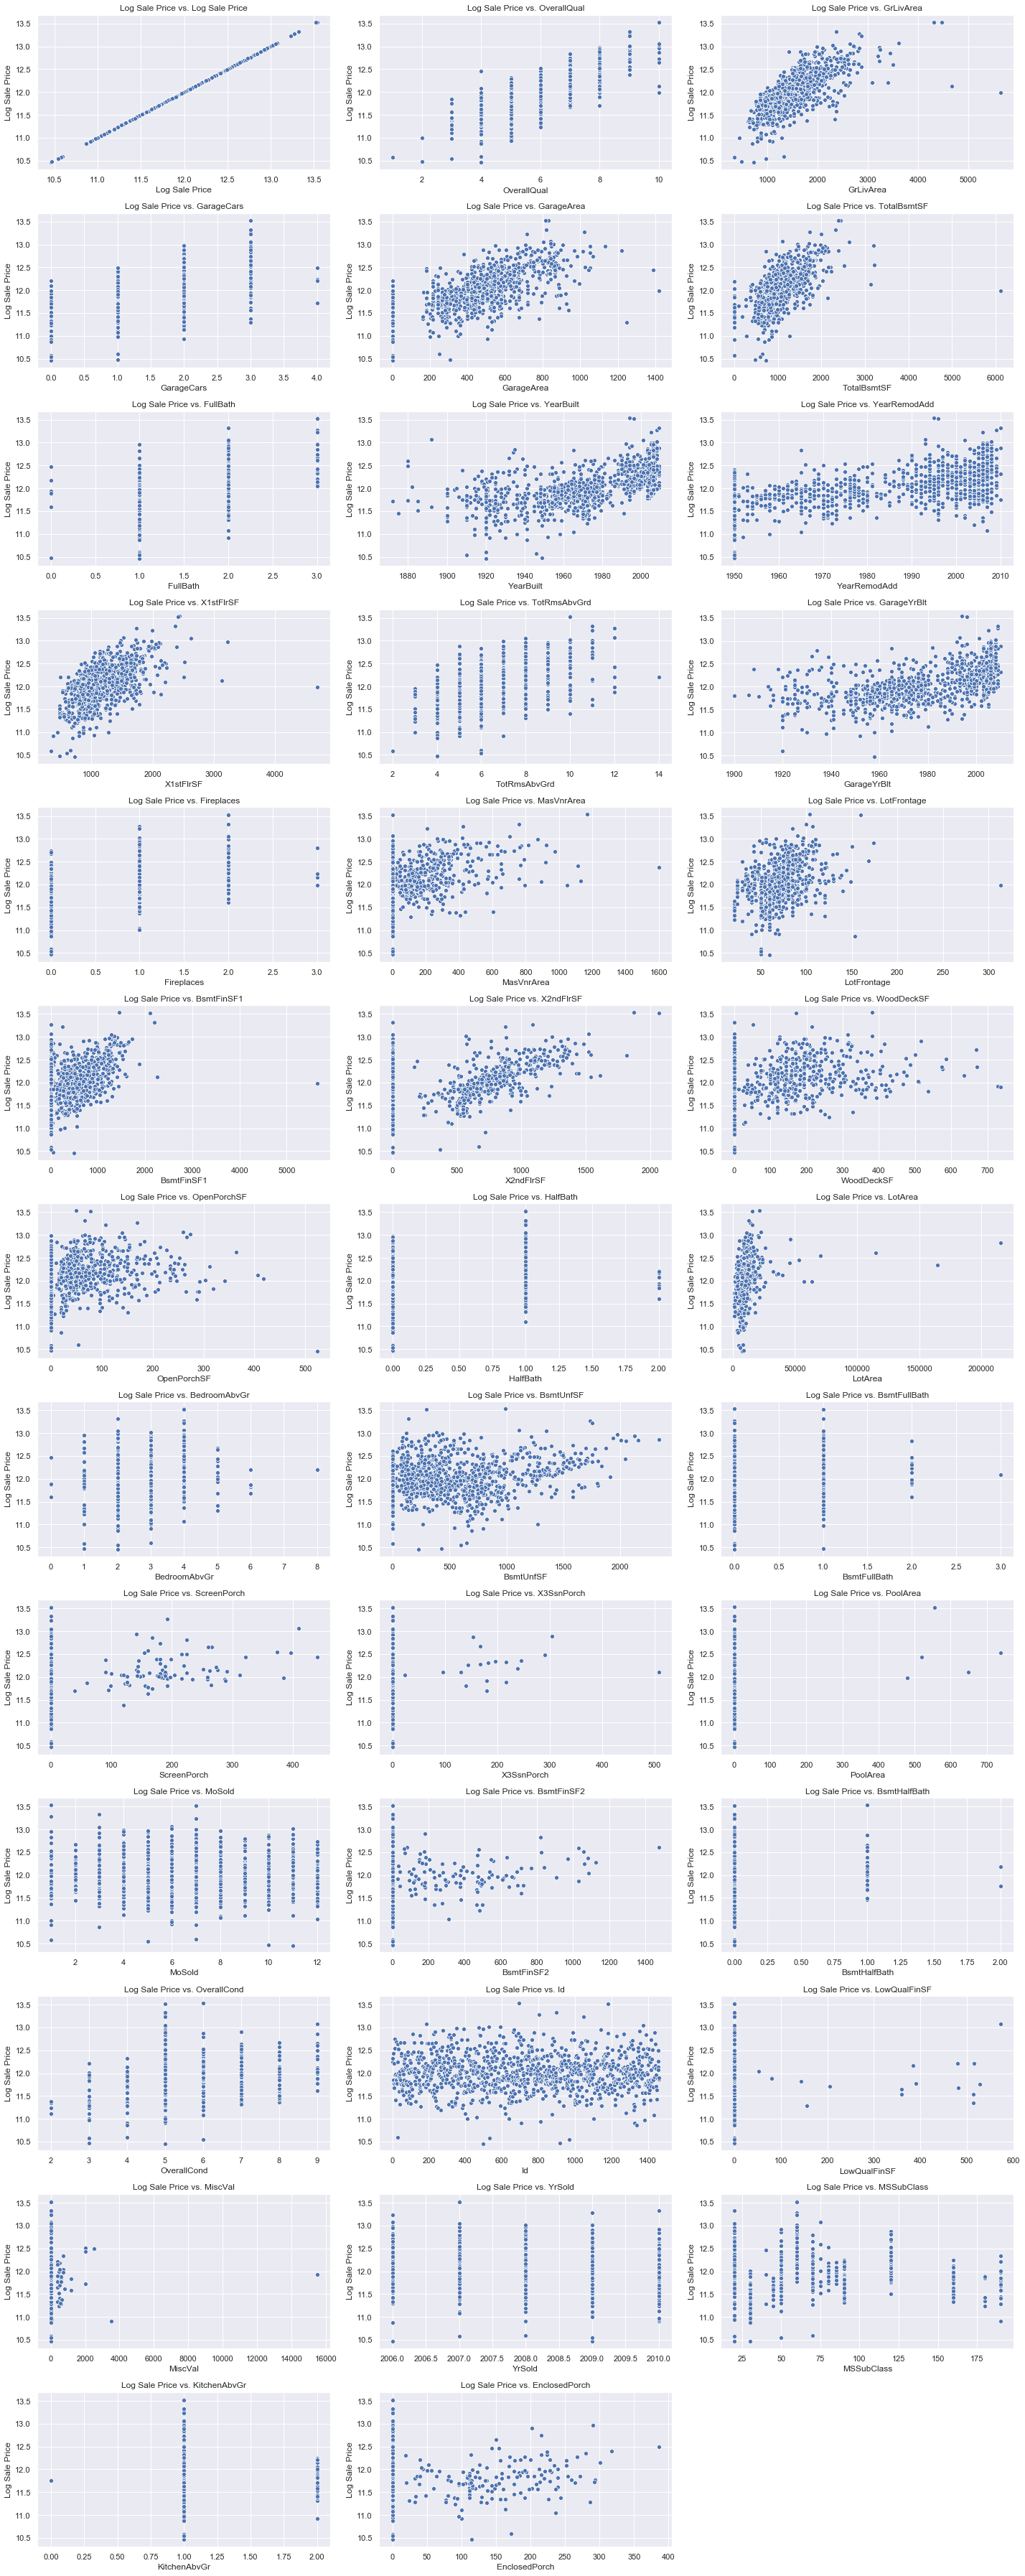

In [15]:
plt.figure(figsize=(20,50))
plt.tight_layout()
for a, b in zip(range(1,len(numeric_columns)+1),variables_with_correlation):
    plt.subplot(13, 3, a)
    sns.scatterplot(x= b[0], y= "Log Sale Price", data=df)
    plt.xlabel(b[0])
    plt.ylabel("Log Sale Price")
    plt.title("Log Sale Price vs. " + b[0])
plt.tight_layout()

In [16]:
import statsmodels.api as sm

x = df["OverallQual"]
y = df["Log Sale Price"]

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Log Sale Price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     2049.
Date:                Tue, 30 Apr 2019   Prob (F-statistic):          9.30e-250
Time:                        18:33:20   Log-Likelihood:                 19.293
No. Observations:                1060   AIC:                            -34.59
Df Residuals:                    1058   BIC:                            -24.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.5546      0.033    318.231      0.000      10.490      10.620
OverallQual     0.2406      0.005     45.268      0.000       0.230       0.251
==============================================================================
Omnibus:                       66.721   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.512
Skew:                          -0.448   Prob(JB):                     1.12e-26
Kurtosis:                       4.380   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Overall quality is statistically significant in the prediction of Sale Price. I will now look at the residuals plotted against the other numeric columns to identify which variables to introduce to the model.

In [17]:
mse = 0
for a, b in zip(results.fittedvalues, df["Log Sale Price"]):
    mse += (np.exp(b) - np.exp(a)) ** 2
mse = mse/len(df)
print("RMSE: ", mse**.5)

RMSE:  46743.29657307728


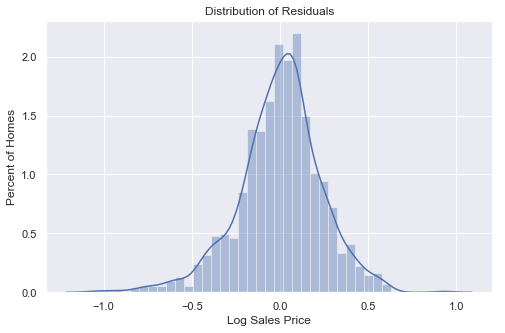

In [18]:
sns.set(rc={'figure.figsize':(8,5)});
sns.distplot(results.resid)
plt.title("Distribution of Residuals")
plt.xlabel("Log Sales Price")
plt.ylabel("Percent of Homes");

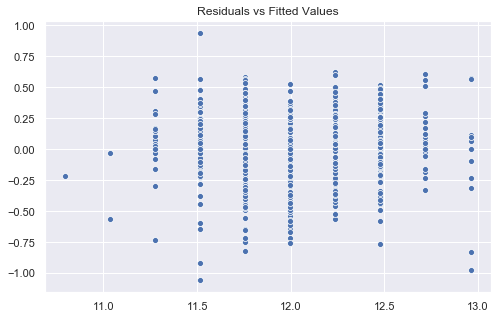

In [19]:
sns.scatterplot(x = results.fittedvalues, y = results.resid)
plt.title("Residuals vs Fitted Values");

In [20]:
np.corrcoef(results.resid, results.fittedvalues)

array([[ 1.00000000e+00, -4.01839087e-15],
       [-4.01839087e-15,  1.00000000e+00]])

Correlation between the residals and fittied values is near 0. We can conclude that the assumption of the normality of the error terms holds true. 

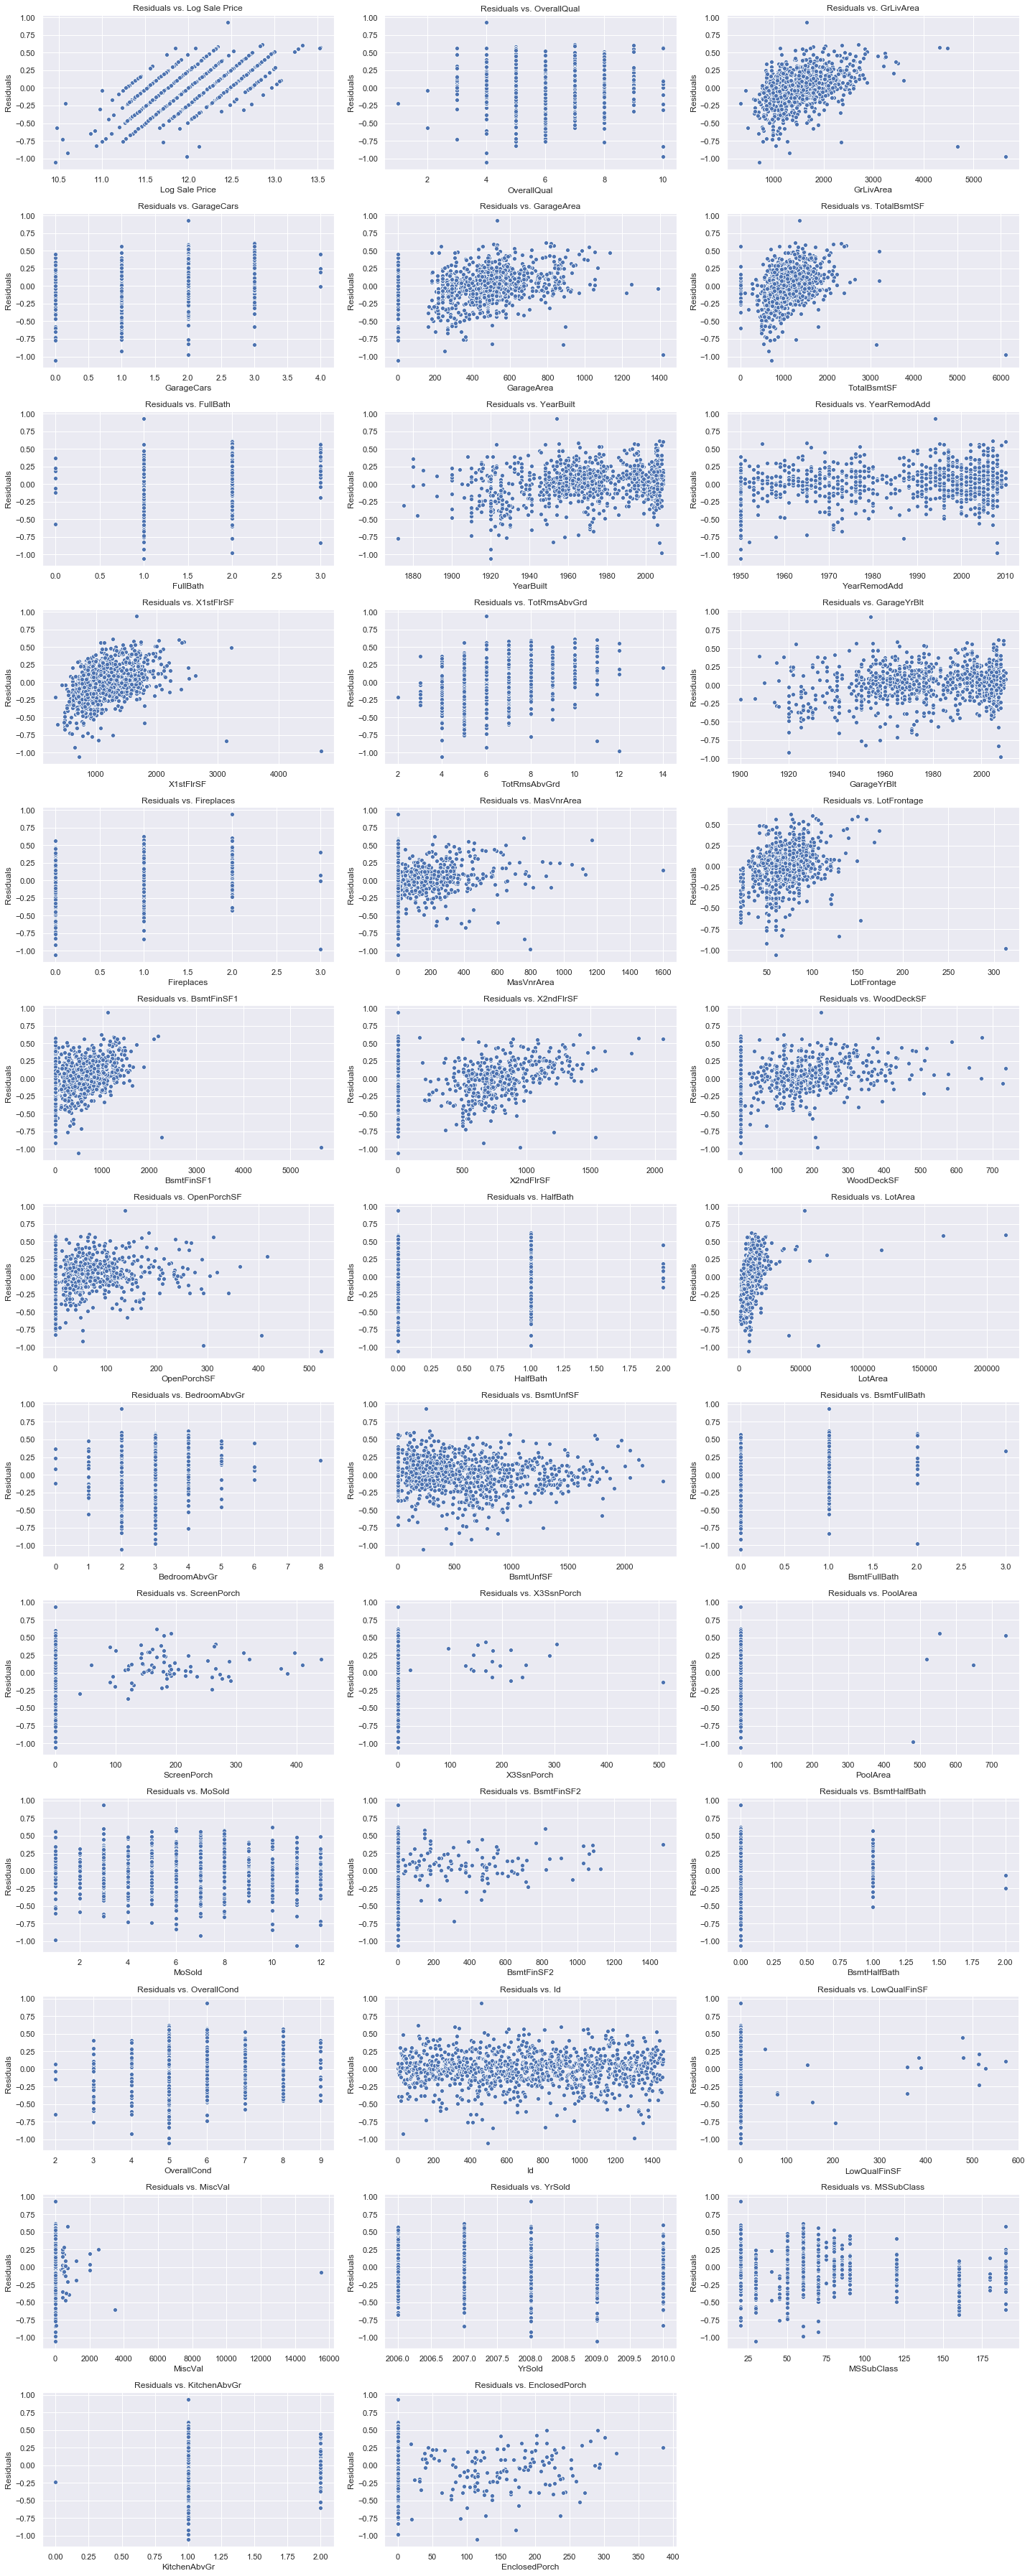

In [21]:
plt.figure(figsize=(20,50))
plt.tight_layout()
for a, b in zip(range(1,len(numeric_columns)+1),variables_with_correlation):
    plt.subplot(13, 3, a)
    sns.scatterplot(x= b[0], y= results.resid, data=df)
    plt.xlabel(b[0])
    plt.ylabel("Residuals")
    plt.title("Residuals vs. " + b[0])
plt.tight_layout()

In [22]:
## Find the variables with the highest correlation with the residuals
variables_with_correlation = []
for i in numeric_columns:
    variables_with_correlation.append([i, round(results.resid.corr(df[i]),2)])
    
## Sort the listr
variables_with_correlation.sort(key=lambda x: x[1], reverse=True)

for i in variables_with_correlation:
    print(i[0], ":",i[1])

Log Sale Price : 0.58
GrLivArea : 0.36
X1stFlrSF : 0.35
TotRmsAbvGrd : 0.32
GarageCars : 0.32
GarageArea : 0.32
BsmtFinSF1 : 0.29
LotFrontage : 0.28
LotArea : 0.27
TotalBsmtSF : 0.27
BsmtFullBath : 0.27
Fireplaces : 0.27
FullBath : 0.26
WoodDeckSF : 0.26
BedroomAbvGr : 0.23
YearBuilt : 0.21
YearRemodAdd : 0.21
GarageYrBlt : 0.15
MasVnrArea : 0.14
HalfBath : 0.13
BsmtFinSF2 : 0.12
X2ndFlrSF : 0.12
OpenPorchSF : 0.11
ScreenPorch : 0.11
OverallCond : 0.09
X3SsnPorch : 0.07
BsmtHalfBath : 0.05
PoolArea : 0.04
LowQualFinSF : 0.01
KitchenAbvGr : 0.01
Id : 0.0
OverallQual : -0.0
MoSold : -0.01
MiscVal : -0.02
YrSold : -0.02
BsmtUnfSF : -0.07
EnclosedPorch : -0.11
MSSubClass : -0.17


Based on the chart and correlation I will introduce two variables to the model. They are GrLivArea and X1stFlrSF

In [23]:
x = df[["OverallQual", "GrLivArea", "X1stFlrSF"]]
y = np.log(df["SalePrice"])

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     1040.
Date:                Tue, 30 Apr 2019   Prob (F-statistic):          1.07e-314
Time:                        18:33:29   Log-Likelihood:                 177.10
No. Observations:                1060   AIC:                            -346.2
Df Residuals:                    1056   BIC:                            -326.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.4802      0.029    357.086      0.000      10.423      10.538
OverallQual     0.1713      0.006     29.148      0.000       0.160       0.183
GrLivArea       0.0002   1.64e-05     11.954      0.000       0.000       0.000
X1stFlrSF       0.0002      2e-05      8.594      0.000       0.000       0.000
==============================================================================
Omnibus:                      571.197   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10239.830
Skew:                          -2.065   Prob(JB):                         0.00
Kurtosis:                      17.656   Cond. No.                     9.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
x.corr()

const  OverallQual  GrLivArea  X1stFlrSF
const          NaN          NaN        NaN        NaN
OverallQual    NaN     1.000000   0.609806   0.466904
GrLivArea      NaN     0.609806   1.000000   0.577155
X1stFlrSF      NaN     0.466904   0.577155   1.000000

In [25]:
## Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(x.values, j) for j in range(x.shape[1])]

[21.69979897427103, 1.6438641277383996, 1.927602454722345, 1.548333986683574]

The variance inflation factor are all below 0 so multicollinearity isn't affected the model.

In [26]:
mse = 0
for a, b in zip(results.fittedvalues, df["Log Sale Price"]):
    mse += (np.exp(b) - np.exp(a)) ** 2
mse = mse/len(df)
print("RMSE: ", mse**.5)

RMSE:  53414.80753201651


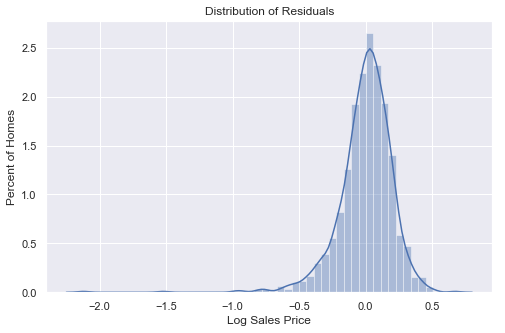

In [27]:
sns.set(rc={'figure.figsize':(8,5)});
sns.distplot(results.resid)
plt.title("Distribution of Residuals")
plt.xlabel("Log Sales Price")
plt.ylabel("Percent of Homes");

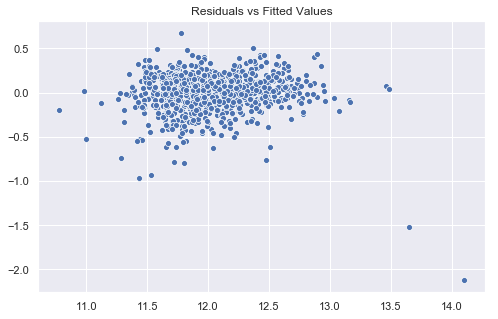

In [28]:
sns.scatterplot(x = results.fittedvalues, y = results.resid)
plt.title("Residuals vs Fitted Values");

In [29]:
np.corrcoef(results.resid, results.fittedvalues)

array([[ 1.00000000e+00, -1.17925202e-13],
       [-1.17925202e-13,  1.00000000e+00]])

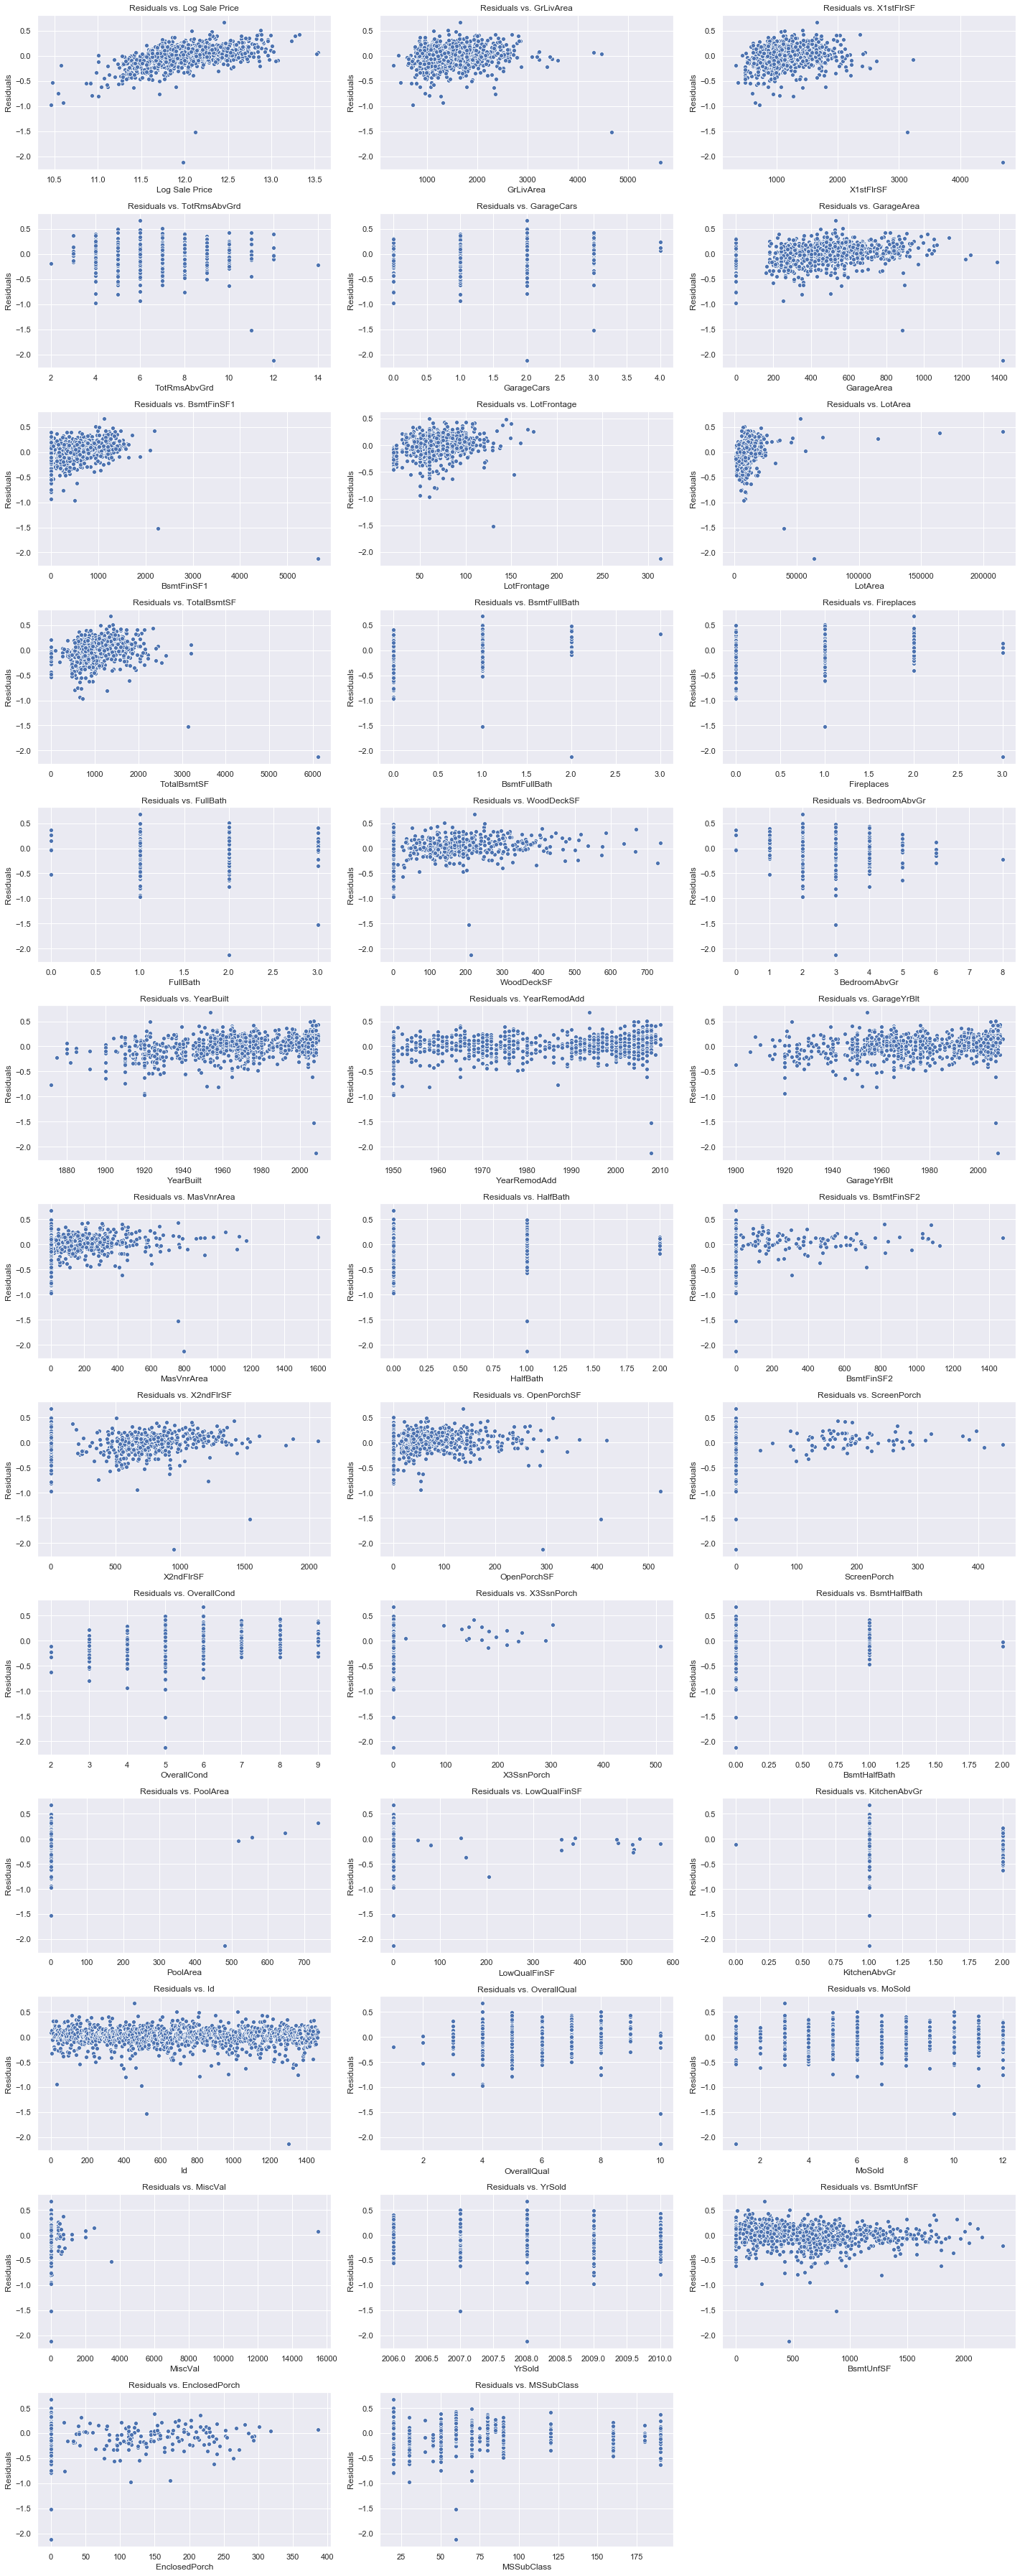

In [30]:
plt.figure(figsize=(20,50))
plt.tight_layout()
for a, b in zip(range(1,len(numeric_columns)+1),variables_with_correlation):
    plt.subplot(13, 3, a)
    sns.scatterplot(x= b[0], y= results.resid, data=df)
    plt.xlabel(b[0])
    plt.ylabel("Residuals")
    plt.title("Residuals vs. " + b[0])
plt.tight_layout()

In [31]:
## Find the variables with the highest correlation with the residuals
variables_with_correlation = []
for i in numeric_columns:
    variables_with_correlation.append([i, round(results.resid.corr(df[i]),2)])
    
## Sort the listr
variables_with_correlation.sort(key=lambda x: x[1], reverse=True)

for i in variables_with_correlation:
    print(i[0], ":",i[1])

Log Sale Price : 0.5
YearBuilt : 0.29
GarageCars : 0.27
YearRemodAdd : 0.26
BsmtFullBath : 0.25
GarageArea : 0.23
GarageYrBlt : 0.2
WoodDeckSF : 0.19
BsmtFinSF1 : 0.18
OverallCond : 0.15
Fireplaces : 0.14
LotArea : 0.13
HalfBath : 0.12
FullBath : 0.1
ScreenPorch : 0.08
LotFrontage : 0.07
BsmtFinSF2 : 0.07
X3SsnPorch : 0.06
MasVnrArea : 0.05
TotalBsmtSF : 0.05
BsmtHalfBath : 0.05
OpenPorchSF : 0.03
BedroomAbvGr : 0.02
TotRmsAbvGrd : 0.02
X2ndFlrSF : 0.01
OverallQual : -0.0
X1stFlrSF : -0.0
GrLivArea : -0.0
MiscVal : -0.01
MoSold : -0.01
Id : -0.02
YrSold : -0.02
LowQualFinSF : -0.07
PoolArea : -0.08
MSSubClass : -0.14
EnclosedPorch : -0.15
KitchenAbvGr : -0.16
BsmtUnfSF : -0.17


In [32]:
x = df[["OverallQual", "GrLivArea", "X1stFlrSF", "YearBuilt"]]
y = np.log(df["SalePrice"])

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     944.4
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:33:38   Log-Likelihood:                 254.86
No. Observations:                1060   AIC:                            -499.7
Df Residuals:                    1055   BIC:                            -474.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.5993      0.456     10.080      0.000       3.704       5.495
OverallQual     0.1253      0.007     19.217      0.000       0.113       0.138
GrLivArea       0.0002   1.57e-05     15.591      0.000       0.000       0.000
X1stFlrSF       0.0001   1.88e-05      7.248      0.000    9.96e-05       0.000
YearBuilt       0.0031      0.000     12.911      0.000       0.003       0.004
==============================================================================
Omnibus:                      652.753   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18522.750
Skew:                          -2.326   Prob(JB):                         0.00
Kurtosis:                      22.943   Cond. No.                     2.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
## Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(x.values, j) for j in range(x.shape[1])]

[6068.201988445106,
 2.3420276074797366,
 2.0465285329330722,
 1.5824553869308724,
 1.5703778242350803]

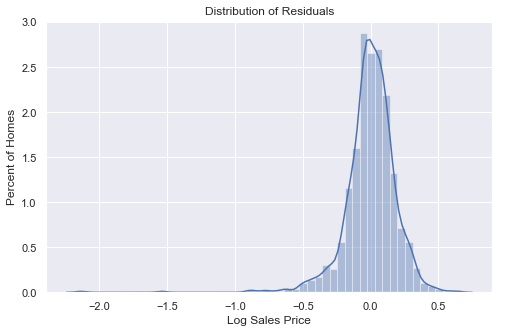

In [34]:
sns.set(rc={'figure.figsize':(8,5)});
sns.distplot(results.resid)
plt.title("Distribution of Residuals")
plt.xlabel("Log Sales Price")
plt.ylabel("Percent of Homes");

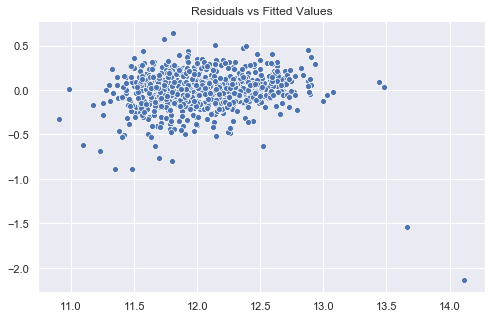

In [35]:
sns.scatterplot(x = results.fittedvalues, y = results.resid)
plt.title("Residuals vs Fitted Values");

In [36]:
np.corrcoef(results.resid, results.fittedvalues)

array([[ 1.00000000e+00, -8.31798787e-14],
       [-8.31798787e-14,  1.00000000e+00]])

In [37]:
## Find the variables with the highest correlation with the residuals
variables_with_correlation = []
for i in numeric_columns:
    variables_with_correlation.append([i, round(results.resid.corr(df[i]),2)])
    
## Sort the listr
variables_with_correlation.sort(key=lambda x: x[1], reverse=True)

for i in variables_with_correlation:
    print(i[0], ":",i[1])

Log Sale Price : 0.47
OverallCond : 0.32
BsmtFullBath : 0.21
GarageCars : 0.19
Fireplaces : 0.18
LotArea : 0.16
GarageArea : 0.16
YearRemodAdd : 0.15
WoodDeckSF : 0.15
BsmtFinSF1 : 0.14
ScreenPorch : 0.13
BsmtFinSF2 : 0.08
LotFrontage : 0.07
BsmtHalfBath : 0.07
X3SsnPorch : 0.06
HalfBath : 0.04
BedroomAbvGr : 0.04
TotRmsAbvGrd : 0.04
TotalBsmtSF : 0.03
MiscVal : 0.01
MoSold : 0.01
OverallQual : -0.0
YearBuilt : -0.0
MasVnrArea : 0.0
X1stFlrSF : -0.0
X2ndFlrSF : 0.0
GrLivArea : -0.0
FullBath : -0.0
Id : -0.01
OpenPorchSF : -0.01
EnclosedPorch : -0.01
LowQualFinSF : -0.02
YrSold : -0.02
GarageYrBlt : -0.03
PoolArea : -0.09
BsmtUnfSF : -0.15
KitchenAbvGr : -0.16
MSSubClass : -0.18


In [38]:
influence = results.get_influence()  
resid_student = influence.resid_studentized_external
resid = pd.concat([x,pd.Series(resid_student,name = "Studentized Residuals")],axis = 1)
resid.loc[np.absolute(resid["Studentized Residuals"]) > 3,:]
ind = resid.loc[np.absolute(resid["Studentized Residuals"]) > 3,:].index
y.drop(ind,axis = 0, inplace = True)
x.drop(ind,axis = 0,inplace = True)  #Interept column is not there

In [39]:
x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1416.
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:33:40   Log-Likelihood:                 462.58
No. Observations:                1048   AIC:                            -915.2
Df Residuals:                    1043   BIC:                            -890.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.5801      0.374     12.234      0.000       3.845       5.315
OverallQual     0.1137      0.005     21.051      0.000       0.103       0.124
GrLivArea       0.0003   1.31e-05     21.599      0.000       0.000       0.000
X1stFlrSF       0.0002   1.58e-05     12.046      0.000       0.000       0.000
YearBuilt       0.0031      0.000     15.686      0.000       0.003       0.003
==============================================================================
Omnibus:                       49.052   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.651
Skew:                          -0.414   Prob(JB):                     4.55e-16
Kurtosis:                       3.965   Cond. No.                     2.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

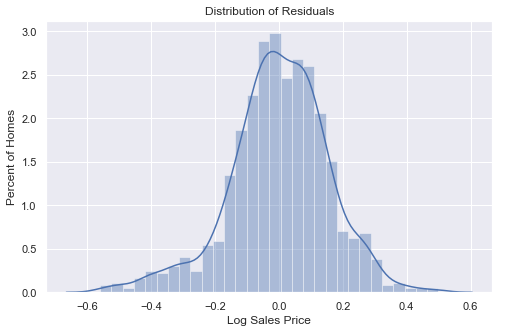

In [40]:
sns.set(rc={'figure.figsize':(8,5)});
sns.distplot(results.resid)
plt.title("Distribution of Residuals")
plt.xlabel("Log Sales Price")
plt.ylabel("Percent of Homes");

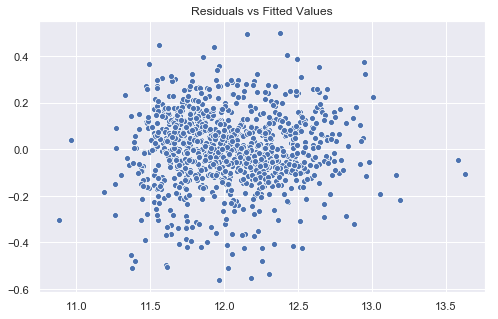

In [41]:
sns.scatterplot(x = results.fittedvalues, y = results.resid)
plt.title("Residuals vs Fitted Values");

In [42]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [vq
vif

VIF Factor     features
0  6036.184694        const
1     2.306724  OverallQual
2     1.917042    GrLivArea
3     1.475870    X1stFlrSF
4     1.552703    YearBuilt

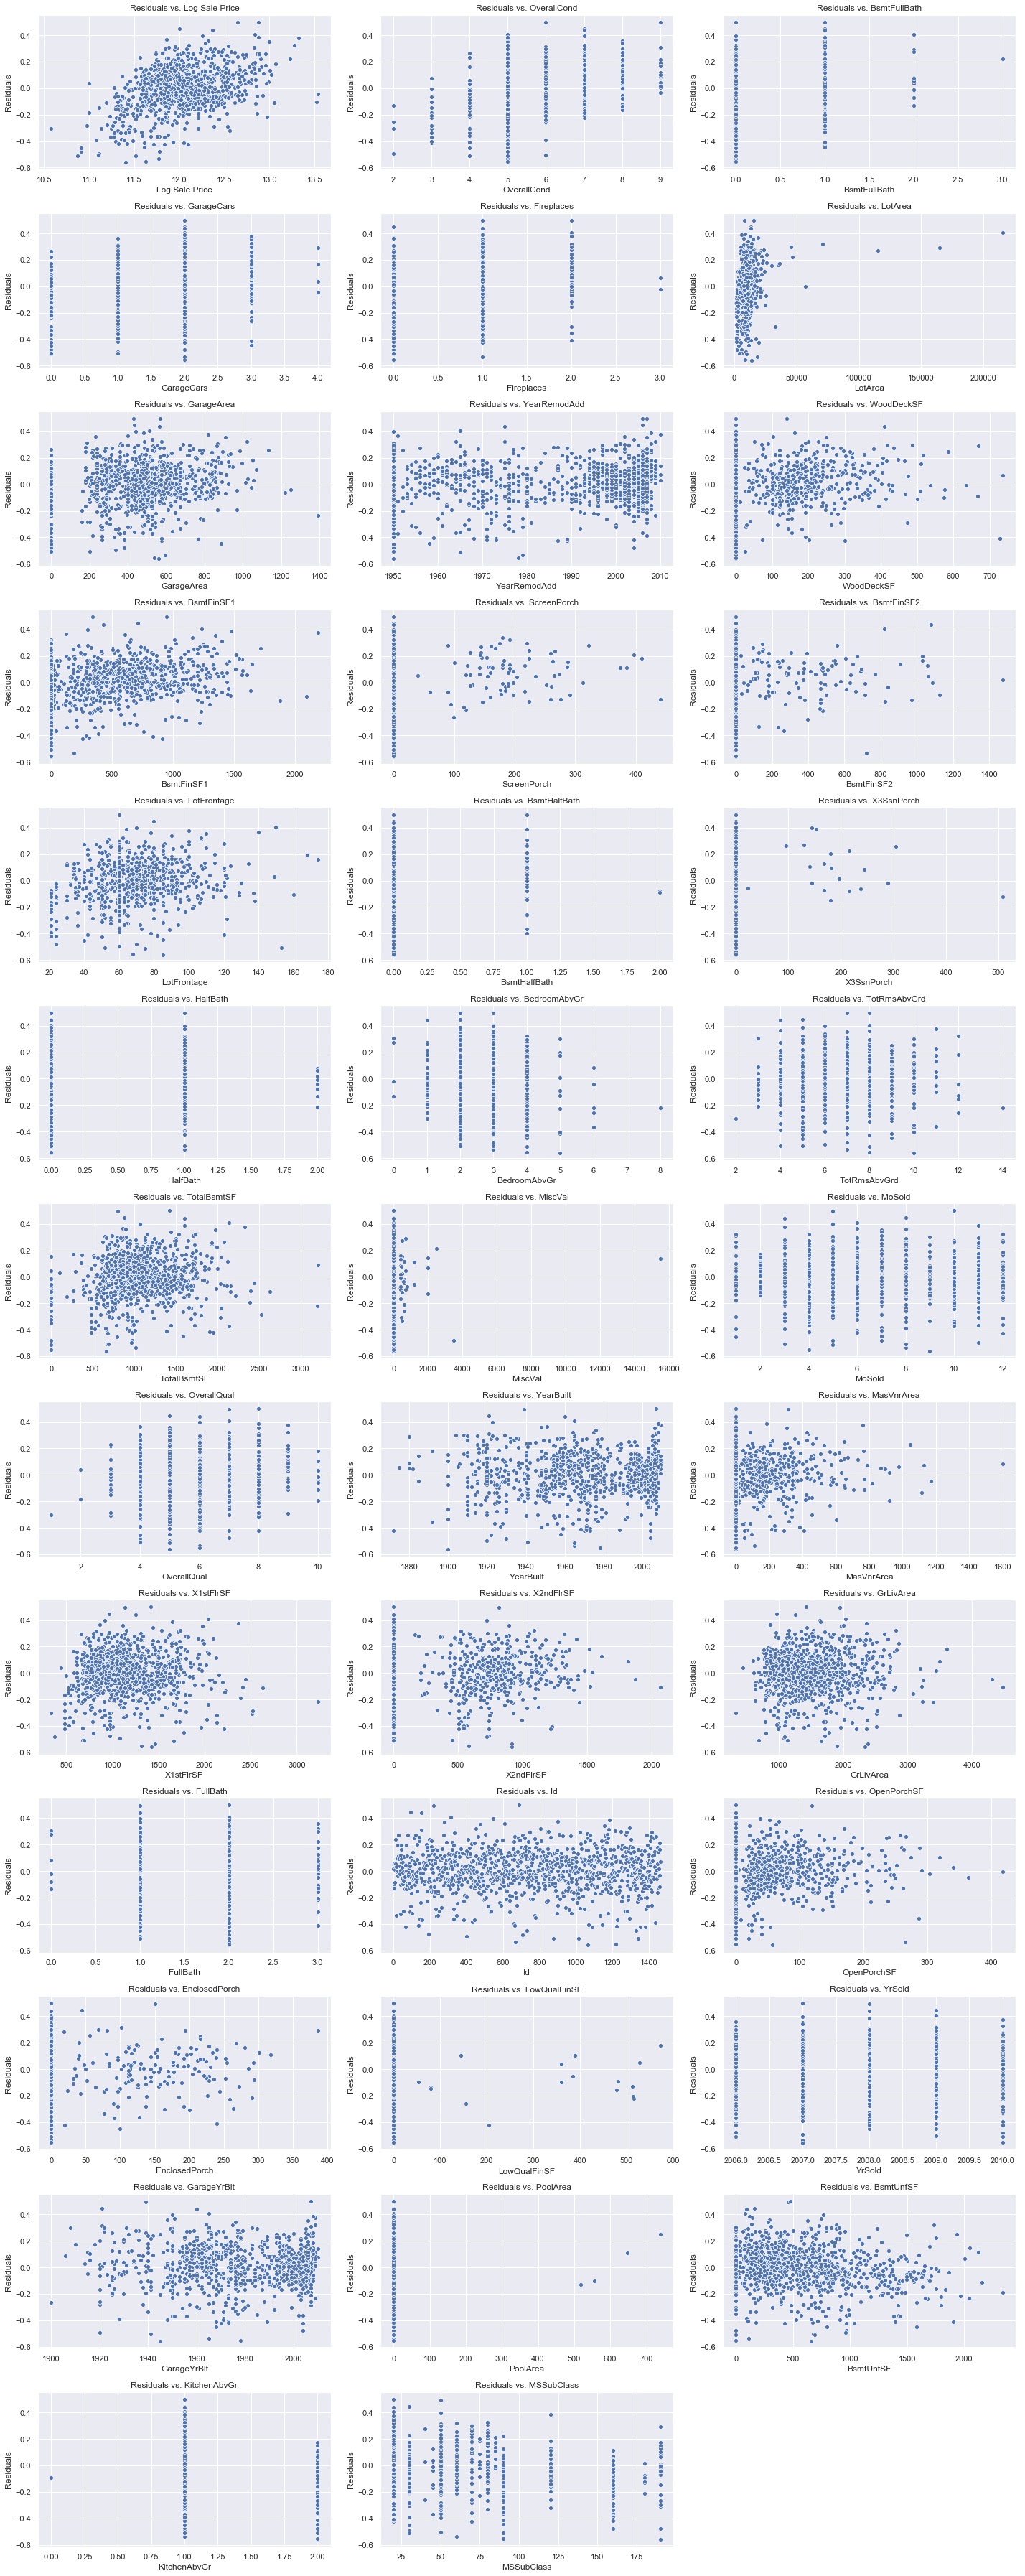

In [43]:
plt.figure(figsize=(20,50))
plt.tight_layout()
for a, b in zip(range(1,len(numeric_columns)+1),variables_with_correlation):
    plt.subplot(13, 3, a)
    sns.scatterplot(x= b[0], y= results.resid, data=df)
    plt.xlabel(b[0])
    plt.ylabel("Residuals")
    plt.title("Residuals vs. " + b[0])
plt.tight_layout()

In [44]:
x = df[["OverallQual", "GrLivArea", "X1stFlrSF", "YearBuilt", "OverallCond"]]
y = np.log(df["SalePrice"])

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     898.0
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:33:49   Log-Likelihood:                 328.16
No. Observations:                1060   AIC:                            -644.3
Df Residuals:                    1054   BIC:                            -614.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.7949      0.481      3.728      0.000       0.850       2.740
OverallQual     0.1077      0.006     17.230      0.000       0.095       0.120
GrLivArea       0.0003   1.47e-05     17.479      0.000       0.000       0.000
X1stFlrSF       0.0002   1.76e-05      8.711      0.000       0.000       0.000
YearBuilt       0.0044      0.000     17.745      0.000       0.004       0.005
OverallCond     0.0678      0.005     12.503      0.000       0.057       0.078
==============================================================================
Omnibus:                      750.665   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34811.126
Skew:                          -2.690   Prob(JB):                         0.00
Kurtosis:                      30.554   Cond. No.                     2.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
influence = results.get_influence()  
resid_student = influence.resid_studentized_external
resid = pd.concat([x,pd.Series(resid_student,name = "Studentized Residuals")],axis = 1)
resid.loc[np.absolute(resid["Studentized Residuals"]) > 3,:]
ind = resid.loc[np.absolute(resid["Studentized Residuals"]) > 3,:].index
y.drop(ind,axis = 0, inplace = True)
x.drop(ind,axis = 0,inplace = True)  #Interept column is not there

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1413.
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:33:51   Log-Likelihood:                 555.24
No. Observations:                1049   AIC:                            -1098.
Df Residuals:                    1043   BIC:                            -1069.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.9319      0.389      4.971      0.000       1.169       2.694
OverallQual     0.0984      0.005     19.421      0.000       0.088       0.108
GrLivArea       0.0003    1.2e-05     24.517      0.000       0.000       0.000
X1stFlrSF       0.0002   1.45e-05     14.396      0.000       0.000       0.000
YearBuilt       0.0043      0.000     21.557      0.000       0.004       0.005
OverallCond     0.0645      0.004     14.725      0.000       0.056       0.073
==============================================================================
Omnibus:                       32.146   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.285
Skew:                          -0.261   Prob(JB):                     7.31e-12
Kurtosis:                       3.949   Cond. No.                     2.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

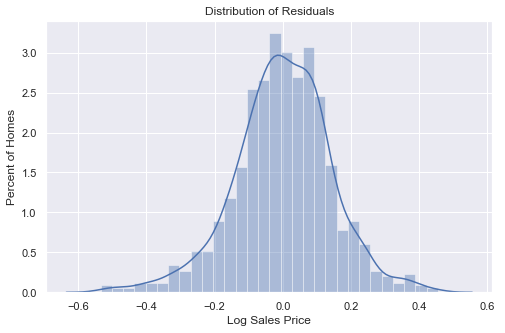

In [46]:
sns.set(rc={'figure.figsize':(8,5)});
sns.distplot(results.resid)
plt.title("Distribution of Residuals")
plt.xlabel("Log Sales Price")
plt.ylabel("Percent of Homes");

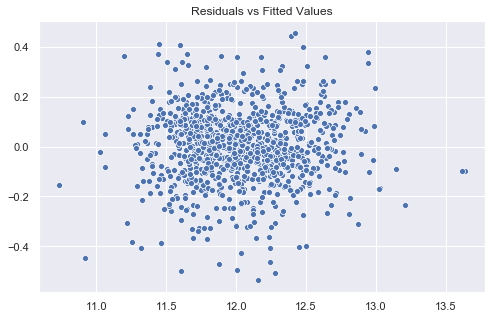

In [47]:
sns.scatterplot(x = results.fittedvalues, y = results.resid)
plt.title("Residuals vs Fitted Values");

In [48]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

VIF Factor     features
0  7754.053002        const
1     2.438259  OverallQual
2     1.933901    GrLivArea
3     1.490097    X1stFlrSF
4     1.874867    YearBuilt
5     1.235661  OverallCond

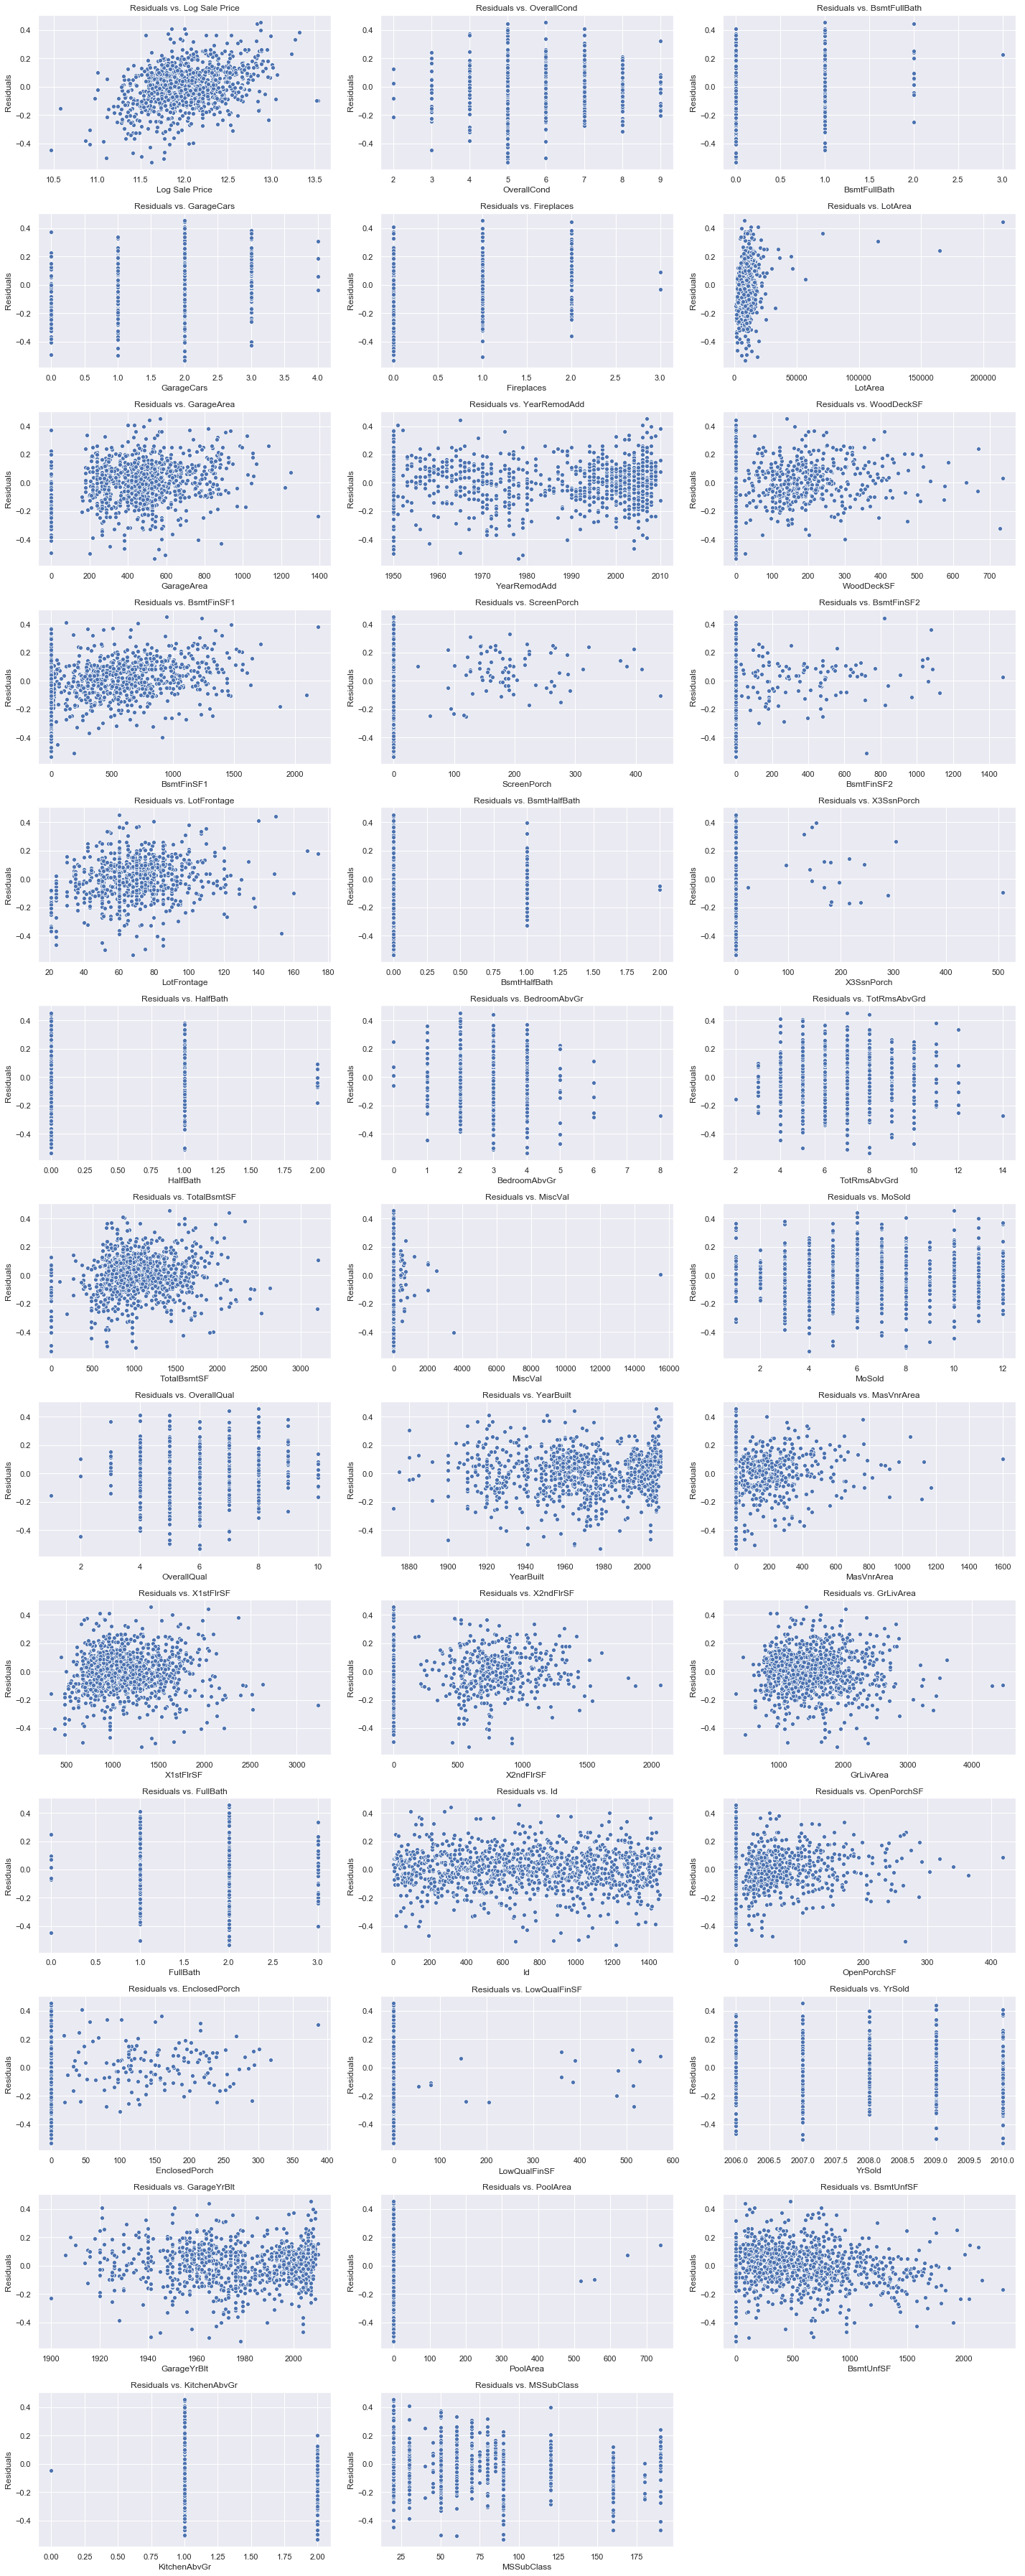

In [49]:
plt.figure(figsize=(20,50))
plt.tight_layout()
for a, b in zip(range(1,len(numeric_columns)+1),variables_with_correlation):
    plt.subplot(13, 3, a)
    sns.scatterplot(x= b[0], y= results.resid, data=df)
    plt.xlabel(b[0])
    plt.ylabel("Residuals")
    plt.title("Residuals vs. " + b[0])
plt.tight_layout()

In [50]:
## Find the variables with the highest correlation with the residuals
variables_with_correlation = []
for i in numeric_columns:
    variables_with_correlation.append([i, round(results.resid.corr(df[i]),2)])
    
## Sort the listr
variables_with_correlation.sort(key=lambda x: x[1], reverse=True)

for i in variables_with_correlation:
    print(i[0], ":",i[1])

Log Sale Price : 0.36
BsmtFinSF1 : 0.3
BsmtFullBath : 0.25
LotArea : 0.23
LotFrontage : 0.2
GarageArea : 0.19
Fireplaces : 0.18
GarageCars : 0.17
TotalBsmtSF : 0.14
ScreenPorch : 0.13
WoodDeckSF : 0.1
OpenPorchSF : 0.07
MasVnrArea : 0.06
BsmtFinSF2 : 0.05
HalfBath : 0.05
EnclosedPorch : 0.05
YearRemodAdd : 0.03
X3SsnPorch : 0.03
BsmtHalfBath : 0.02
MoSold : 0.02
PoolArea : 0.01
OverallQual : -0.0
OverallCond : 0.0
YearBuilt : -0.0
X1stFlrSF : -0.0
X2ndFlrSF : 0.0
GrLivArea : -0.0
GarageYrBlt : -0.01
Id : -0.02
TotRmsAbvGrd : -0.02
MiscVal : -0.02
YrSold : -0.03
LowQualFinSF : -0.04
FullBath : -0.05
BedroomAbvGr : -0.05
BsmtUnfSF : -0.17
MSSubClass : -0.19
KitchenAbvGr : -0.22


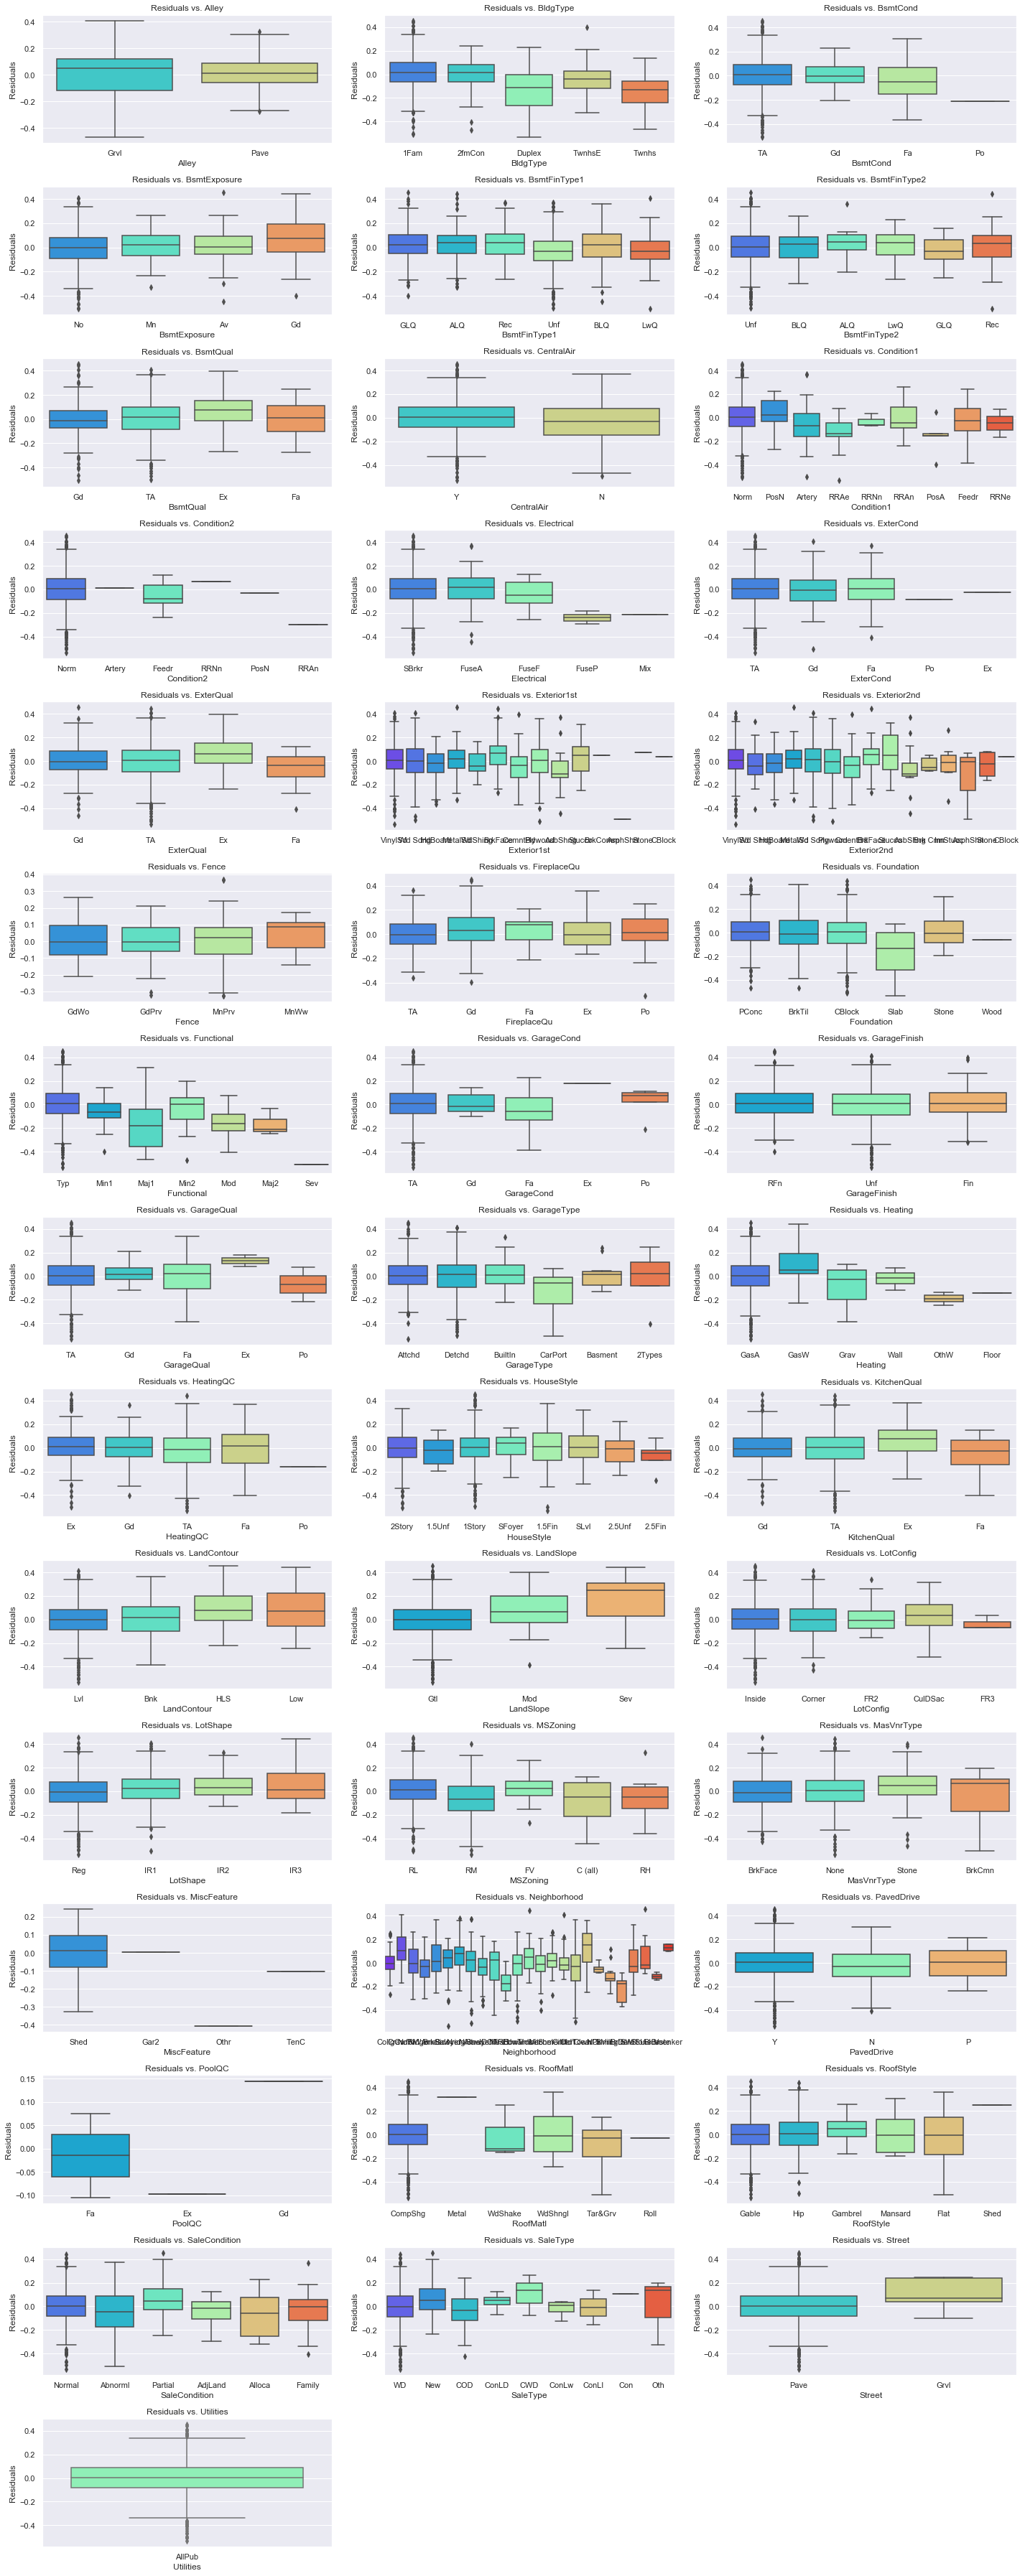

In [51]:
categorial_columns = sorted(df.select_dtypes(include = ["object"]).columns)
df_no_outlier = df.drop(ind,axis = 0)

plt.figure(figsize=(20,50))
plt.tight_layout()
for a, b in zip(range(1,len(categorial_columns)+1),categorial_columns):
    plt.subplot(15, 3, a)
    sns.boxplot(x= b, y= results.resid,palette='rainbow', data = df_no_outlier)
    plt.xlabel(b)
    plt.ylabel("Residuals")
    plt.title("Residuals vs. " + b)
plt.tight_layout()

In [52]:
subclass_dummies = pd.get_dummies(df["MSSubClass"]).drop(20,1)
x = df[["OverallQual", "GrLivArea", "X1stFlrSF", "YearBuilt", "OverallCond"]]
x = pd.concat([x, subclass_dummies],1)
y = np.log(df["SalePrice"])

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     260.9
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:34:20   Log-Likelihood:                 376.95
No. Observations:                1060   AIC:                            -713.9
Df Residuals:                    1040   BIC:                            -614.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6862      0.761      0.901      0.368      -0.807       2.180
OverallQual     0.1014      0.007     15.265      0.000       0.088       0.114
GrLivArea       0.0003   2.78e-05     10.053      0.000       0.000       0.000
X1stFlrSF    9.092e-05   3.47e-05      2.621      0.009    2.28e-05       0.000
YearBuilt       0.0050      0.000     12.884      0.000       0.004       0.006
OverallCond     0.0606      0.005     11.258      0.000       0.050       0.071
30             -0.0724      0.030     -2.388      0.017      -0.132      -0.013
40             -0.0169      0.100     -0.168      0.866      -0.214       0.180
45             -0.0829      0.058     -1.431      0.153      -0.197       0.031
50             -0.0054      0.028     -0.191      0.849      -0.061       0.050
60             -0.0502      0.031     -1.601      0.110      -0.112       0.011
70              0.0406      0.040      1.021      0.308      -0.037       0.119
75              0.0453      0.068      0.663      0.508      -0.089       0.180
80             -0.0079      0.029     -0.273      0.785      -0.065       0.049
85              0.0134      0.047      0.284      0.776      -0.079       0.106
90             -0.1306      0.029     -4.549      0.000      -0.187      -0.074
120            -0.0514      0.025     -2.033      0.042      -0.101      -0.002
160            -0.2289      0.035     -6.513      0.000      -0.298      -0.160
180            -0.2255      0.062     -3.624      0.000      -0.348      -0.103
190            -0.0222      0.043     -0.517      0.605      -0.106       0.062
==============================================================================
Omnibus:                      734.353   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32493.976
Skew:                          -2.615   Prob(JB):                         0.00
Kurtosis:                      29.615   Cond. No.                     4.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
influence = results.get_influence()  
resid_student = influence.resid_studentized_external
resid = pd.concat([x,pd.Series(resid_student,name = "Studentized Residuals")],axis = 1)
resid.loc[np.absolute(resid["Studentized Residuals"]) > 3,:]
ind = resid.loc[np.absolute(resid["Studentized Residuals"]) > 3,:].index
y.drop(ind,axis = 0, inplace = True)
x.drop(ind,axis = 0,inplace = True)  #Interept column is not there

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     429.9
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:34:23   Log-Likelihood:                 639.18
No. Observations:                1046   AIC:                            -1238.
Df Residuals:                    1026   BIC:                            -1139.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9844      0.593      1.661      0.097      -0.179       2.148
OverallQual     0.0881      0.005     16.869      0.000       0.078       0.098
GrLivArea       0.0003   2.17e-05     13.201      0.000       0.000       0.000
X1stFlrSF       0.0002   2.78e-05      6.940      0.000       0.000       0.000
YearBuilt       0.0048      0.000     15.990      0.000       0.004       0.005
OverallCond     0.0567      0.004     13.423      0.000       0.048       0.065
30             -0.0434      0.024     -1.825      0.068      -0.090       0.003
40              0.0011      0.078      0.015      0.988      -0.151       0.154
45             -0.0475      0.045     -1.056      0.291      -0.136       0.041
50              0.0246      0.022      1.111      0.267      -0.019       0.068
60              0.0013      0.025      0.054      0.957      -0.047       0.050
70              0.0721      0.031      2.290      0.022       0.010       0.134
75              0.0587      0.053      1.104      0.270      -0.046       0.163
80             -0.0002      0.022     -0.010      0.992      -0.044       0.044
85              0.0462      0.037      1.258      0.209      -0.026       0.118
90             -0.1530      0.022     -6.859      0.000      -0.197      -0.109
120            -0.0402      0.020     -2.046      0.041      -0.079      -0.002
160            -0.1674      0.028     -6.048      0.000      -0.222      -0.113
180            -0.1851      0.048     -3.831      0.000      -0.280      -0.090
190            -0.0227      0.033     -0.681      0.496      -0.088       0.043
==============================================================================
Omnibus:                       13.607   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.309
Skew:                          -0.002   Prob(JB):                     1.43e-05
Kurtosis:                       3.715   Cond. No.                     4.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
mse = 0
for a, b in zip(results.fittedvalues, df.drop(ind,axis = 0)["Log Sale Price"]):
    mse += (np.exp(b) - np.exp(a)) ** 2
mse = mse/len(df)
print("RMSE: ", mse**.5)

RMSE:  26811.76037372657


## Try the final model with a train and test split

In [55]:
from sklearn.model_selection import train_test_split

y = df["Log Sale Price"]
x = df.drop(["SalePrice", "Log Sale Price"], 1)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [56]:
x = X_train[["OverallQual", "GrLivArea", "X1stFlrSF", "YearBuilt", "OverallCond"]].reset_index(drop = True)
y = y_train.reset_index(drop = True)

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Log Sale Price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     694.1
Date:                Tue, 30 Apr 2019   Prob (F-statistic):          1.04e-295
Time:                        18:34:24   Log-Likelihood:                 256.09
No. Observations:                 848   AIC:                            -500.2
Df Residuals:                     842   BIC:                            -471.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.6574      0.550      3.015      0.003       0.579       2.736
OverallQual     0.1061      0.007     15.065      0.000       0.092       0.120
GrLivArea       0.0003   1.65e-05     15.140      0.000       0.000       0.000
X1stFlrSF       0.0001   1.96e-05      7.035      0.000    9.94e-05       0.000
YearBuilt       0.0045      0.000     15.836      0.000       0.004       0.005
OverallCond     0.0693      0.006     11.360      0.000       0.057       0.081
==============================================================================
Omnibus:                      631.939   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29734.946
Skew:                          -2.860   Prob(JB):                         0.00
Kurtosis:                      31.440   Cond. No.                     2.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
influence = results.get_influence()  
resid_student = influence.resid_studentized_external
resid = pd.concat([x,pd.Series(resid_student,name = "Studentized Residuals")],axis = 1)
resid.loc[np.absolute(resid["Studentized Residuals"]) > 3,:]
ind = resid.loc[np.absolute(resid["Studentized Residuals"]) > 3,:].index
x.drop(ind,axis = 0,inplace = True)  #Interept column is not there
y.drop(ind,axis = 0, inplace = True)

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Log Sale Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1195.
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:34:25   Log-Likelihood:                 472.08
No. Observations:                 838   AIC:                            -932.2
Df Residuals:                     832   BIC:                            -903.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8741      0.426      4.400      0.000       1.038       2.710
OverallQual     0.0957      0.005     17.460      0.000       0.085       0.106
GrLivArea       0.0003    1.3e-05     22.853      0.000       0.000       0.000
X1stFlrSF       0.0002   1.56e-05     12.938      0.000       0.000       0.000
YearBuilt       0.0043      0.000     19.827      0.000       0.004       0.005
OverallCond     0.0659      0.005     13.913      0.000       0.057       0.075
==============================================================================
Omnibus:                       24.568   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.424
Skew:                          -0.203   Prob(JB):                     3.72e-10
Kurtosis:                       4.039   Cond. No.                     2.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

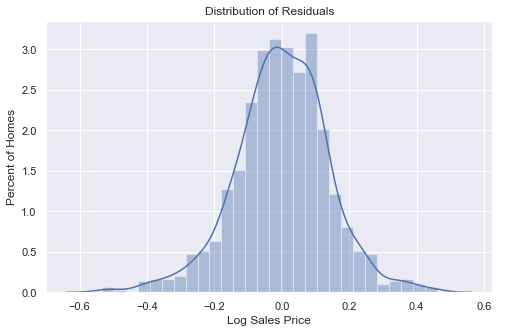

In [58]:
sns.set(rc={'figure.figsize':(8,5)});
sns.distplot(results.resid)
plt.title("Distribution of Residuals")
plt.xlabel("Log Sales Price")
plt.ylabel("Percent of Homes");

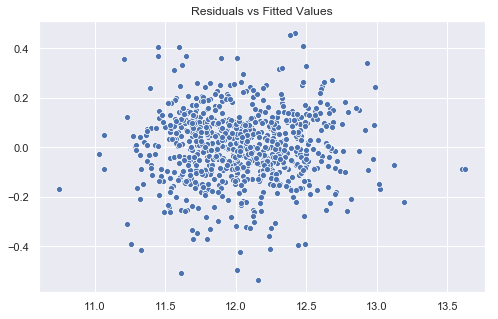

In [59]:
sns.scatterplot(x = results.fittedvalues, y = results.resid)
plt.title("Residuals vs Fitted Values");

In [60]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

VIF Factor     features
0  7954.820487        const
1     2.434103  OverallQual
2     1.929862    GrLivArea
3     1.488998    X1stFlrSF
4     1.880952    YearBuilt
5     1.246979  OverallCond

In [61]:
mse = 0
for a, b in zip(results.fittedvalues, y):
    mse += (np.exp(b) - np.exp(a)) ** 2
mse = mse/len(df)
print("RMSE: ", mse**.5)

RMSE:  24373.486478524275


In [62]:
ynewpred =  results.predict(sm.add_constant(X_test[["OverallQual", "GrLivArea", "X1stFlrSF", "YearBuilt", "OverallCond"]])) # predict out of sample

In [63]:
mse = 0
for a, b in zip(ynewpred.reset_index(drop = True), y_test.reset_index(drop = True)):
    mse += (np.exp(b) - np.exp(a)) ** 2
mse = mse/len(df)
print("RMSE: ", mse**.5)

RMSE:  14769.966206034365


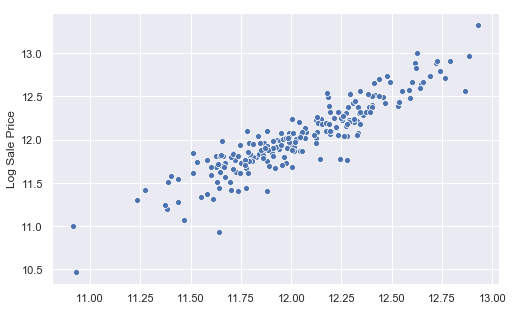

In [66]:
sns.scatterplot(ynewpred, y_test);

In [72]:
np.corrcoef(ynewpred,y_test)**2

array([[1.        , 0.84110089],
       [0.84110089, 1.        ]])

In [73]:
len(ynewpred)

212

# Kaggle Validation

In [154]:
kaggle = df = pd.read_csv("/Users/Jonathan.Toro/Documents/Hunter/STAT 707/Final Project/Data/Kaggle validation.csv")

In [159]:
ynewpred =  results.predict(sm.add_constant(kaggle[["OverallQual", "GrLivArea", "1stFlrSF", "YearBuilt", "OverallCond"]])) # predict out of sample

In [164]:
np.exp(ynewpred).to_excel("Predictions.xlsx")